<a href="https://colab.research.google.com/github/ChetanB1997/ML_CardioVascular_risk_prediction/blob/main/cardiovascular_risk_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Cardiovascular risk prediction



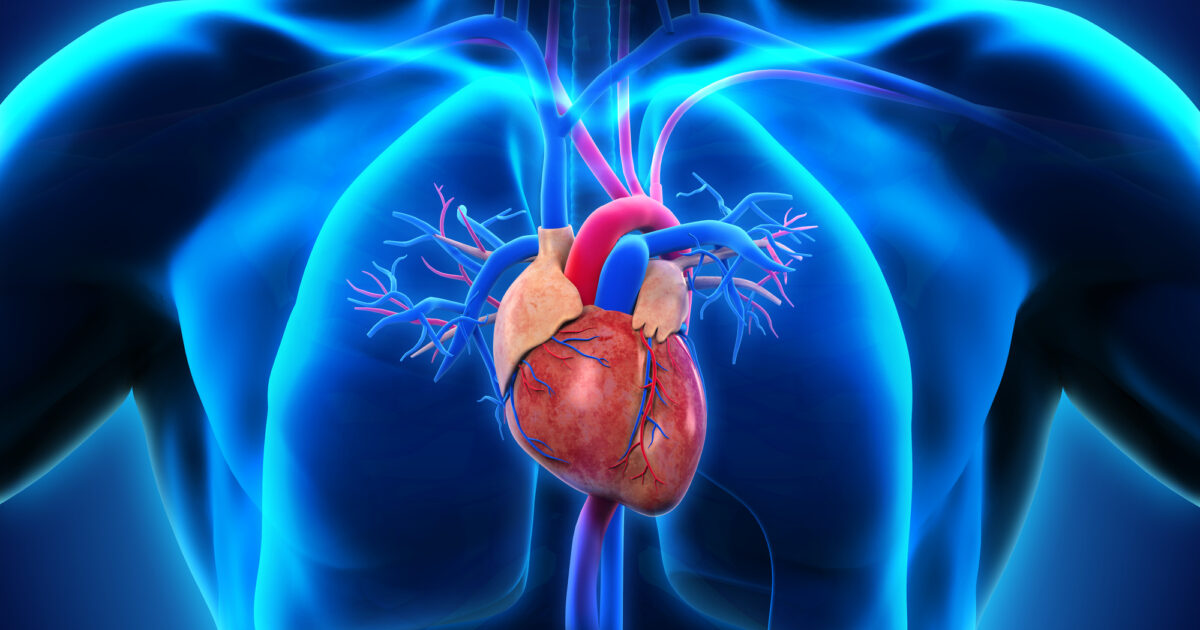

Project type - Classification

Author- Chetan badgujar

Git hub link- https://github.com/ChetanB1997/ML_CardioVascular_risk_prediction

# **Project Summary -**

Heart disease, also known as cardiovascular disease, is a general term that refers to a group of conditions that affect the heart and blood vessels. The most common forms of heart disease include coronary artery disease, heart valve disease, and heart failure.

Current practices for the prevention and treatment of heart disease include lifestyle changes such as maintaining a healthy diet, regular exercise, and not smoking. Medications such as statins, blood pressure medications, and anticoagulants are also commonly used to lower the risk of heart disease. In some cases, interventional procedures such as angioplasty or bypass surgery may be necessary to treat advanced cases of heart disease.

Background research on heart disease has led to a better understanding of the underlying causes and risk factors for the condition. Some of the major risk factors for heart disease include high blood pressure, high cholesterol, diabetes, smoking, and a family history of the condition. Studies have also shown that certain lifestyle factors, such as diet and physical activity, can have a significant impact on the development of heart disease.

Recent research has also focused on identifying new treatments for heart disease, as well as ways to improve the effectiveness of existing treatments. This has led to the development of new medications and procedures, such as minimally invasive surgeries and the use of stem cells to repair damaged heart tissue.

Overall, the field of heart disease research is constantly evolving, with new findings and treatments being developed all the time

# **Problem Statement**


Do classification (Diseased or Not Diseased) on this data and choose the best model with highest accuracy.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import KNNImputer
from sklearn.feature_selection import chi2
from sklearn.metrics import recall_score
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

from prettytable import PrettyTable

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
sns.set()

### Dataset Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load Dataset
path = '/content/drive/MyDrive/AlmaBetter/ML capstone /data_cardiovascular_risk.csv'

df = pd.read_csv(path , index_col = "id")

### Dataset First View

In [ ]:
# Dataset First Look
df.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
id,,,,,,,,,,,,,,,,
0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
df.shape

(3390, 16)

### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3390 entries, 0 to 3389
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3390 non-null   int64  
 1   education        3303 non-null   float64
 2   sex              3390 non-null   object 
 3   is_smoking       3390 non-null   object 
 4   cigsPerDay       3368 non-null   float64
 5   BPMeds           3346 non-null   float64
 6   prevalentStroke  3390 non-null   int64  
 7   prevalentHyp     3390 non-null   int64  
 8   diabetes         3390 non-null   int64  
 9   totChol          3352 non-null   float64
 10  sysBP            3390 non-null   float64
 11  diaBP            3390 non-null   float64
 12  BMI              3376 non-null   float64
 13  heartRate        3389 non-null   float64
 14  glucose          3086 non-null   float64
 15  TenYearCHD       3390 non-null   int64  
dtypes: float64(9), int64(5), object(2)
memory usage: 450.2+ KB


#### Duplicate Values

In [ ]:
df.duplicated().value_counts()

False    3390
dtype: int64

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df.isnull().sum()

age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

In [ ]:
df.isna().sum().sum()

510

visualizing missing values

<Axes: ylabel='id'>

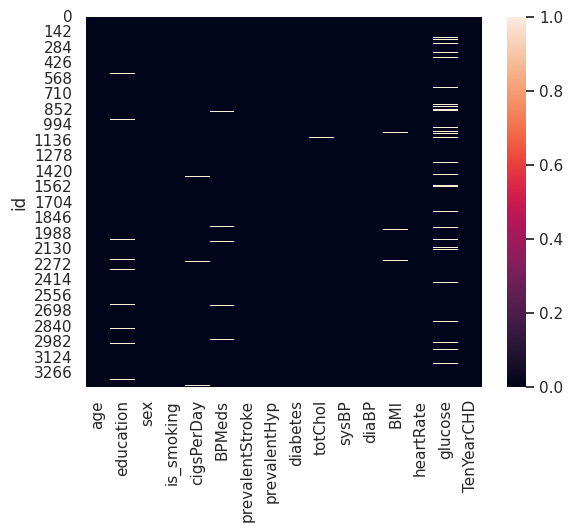

In [ ]:
# Plotting the heatmap for missing values
missing_values = df.isnull()
sns.heatmap(missing_values)

The dataset contains 3390 rows and 16 columns. There are no duplicate records, and contains total of 510 missing values.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

Index(['age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [ ]:
# Dataset Describe
df.describe()

,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,49.542183,1.970936,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,8.592878,1.019081,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


### Variables Description

**Sex:** male or female ("M" or "F")

**Age:** Age of the patient (Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)

**Education:** The level of education of the patient (categorical values - 1,2,3,4)

**is_smoking:** whether or not the patient is a current smoker ("YES" or "NO")

**Cigs Per Day:** the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)

**BP Meds:** whether or not the patient was on blood pressure medication (Nominal)

**Prevalent Stroke:** whether or not the patient had previously had a stroke (Nominal)

**Prevalent Hyp:** whether or not the patient was hypertensive (Nominal)

**Diabetes:** whether or not the patient had diabetes (Nominal)

**Tot Chol:** total cholesterol level (Continuous)

**Sys BP:** systolic blood pressure (Continuous)

**Dia BP:** diastolic blood pressure (Continuous)

**BMI:** Body Mass Index (Continuous)

**Heart Rate:** heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)

**Glucose:** glucose level (Continuous)

**TenYearCHD:**10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”)

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
df.nunique()

age                  39
education             4
sex                   2
is_smoking            2
cigsPerDay           32
BPMeds                2
prevalentStroke       2
prevalentHyp          2
diabetes              2
totChol             240
sysBP               226
diaBP               142
BMI                1259
heartRate            68
glucose             132
TenYearCHD            2
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

we will make column names more informative so rename the columns.

In [ ]:
# Renaming the columns
df.rename(columns={'cigsPerDay':'cigs_per_day','BPMeds':'bp_meds',
                   'prevalentStroke':'prevalent_stroke','prevalentHyp':'prevalent_hyp',
                   'totChol':'total_cholesterol','sysBP':'systolic_bp','diaBP':'diastolic_bp',
                   'BMI':'bmi','heartRate':'heart_rate','TenYearCHD':'ten_year_chd'},
          inplace = True)


In [ ]:
# Defining 3 lists containing the column names of
# a. dependent variables
# b. continuous independent variables
# c. categorical independent variables
# This is defined based on the number of unique values for each attribute

dependent_var = ['ten_year_chd']
continuous_var = ['age','cigs_per_day','total_cholesterol','systolic_bp', 'diastolic_bp', 'bmi', 'heart_rate', 'glucose']
categorical_var = ['education', 'sex', 'is_smoking','bp_meds','prevalent_stroke', 'prevalent_hyp', 'diabetes']

In [ ]:
# Replacing the missing values in the categorical columns with its mode
df['education'] = df['education'].fillna(df['education'].mode()[0])
df['bp_meds'] = df['bp_meds'].fillna(df['bp_meds'].mode()[0])

we have the categourical variables education (87) and bp_meds (44) having missing values so will replace them with mode.

In [ ]:
# education distribution after mode imputation
df.education.value_counts()

1.0    1478
2.0     990
3.0     549
4.0     373
Name: education, dtype: int64

In [ ]:
# bp_meds distribution after mode imputation
df.bp_meds.value_counts()

0.0    3290
1.0     100
Name: bp_meds, dtype: int64

###Variable: cigs_per_day

In [ ]:
# Mean and median number of cigarettes per day
print(df.cigs_per_day.mean().round(0))
print(df.cigs_per_day.median())

9.0
0.0


In [ ]:
df[df['cigs_per_day'].isna()]


,age,education,sex,is_smoking,cigs_per_day,bp_meds,prevalent_stroke,prevalent_hyp,diabetes,total_cholesterol,systolic_bp,diastolic_bp,bmi,heart_rate,glucose,ten_year_chd
id,,,,,,,,,,,,,,,,
422,55,1.0,F,YES,NaN,0.0,0,1,0,213.0,163.0,91.0,28.66,69.0,66.0,0
466,45,3.0,M,YES,NaN,0.0,0,1,0,170.0,145.5,99.0,26.74,83.0,85.0,0
469,42,1.0,M,YES,NaN,0.0,0,0,0,196.0,123.0,73.0,22.06,66.0,NaN,0
491,61,1.0,F,YES,NaN,0.0,0,1,0,356.0,168.0,98.0,27.30,103.0,106.0,0
538,41,1.0,F,YES,NaN,0.0,0,0,0,171.0,135.0,82.5,24.35,79.0,82.0,0
767,54,1.0,M,YES,NaN,0.0,0,0,0,219.0,110.0,72.0,26.05,95.0,86.0,0
1461,47,2.0,F,YES,NaN,0.0,0,0,0,365.0,127.0,76.0,24.44,72.0,80.0,0
1467,49,1.0,F,YES,NaN,0.0,0,0,0,252.0,123.0,69.0,21.45,72.0,89.0,0
1597,57,1.0,F,YES,NaN,0.0,0,0,0,229.0,115.0,69.0,24.43,80.0,93.0,0


here we see fo null values of cigs_per_day column are yes for every person who is smoking.means these all persons are smoker so we can not replace null values with zeroes

In [ ]:

# mean and median number of cigarettes per day for a smoker (excluding non-smokers)
a=(df[df['is_smoking']=='YES']['cigs_per_day'].mean())
b=(df[df['is_smoking']=='YES']['cigs_per_day'].median())
print("Mean number of cigarettes for a smoker :",a)
print("Median number of cigarettes for a smoker :",b )

Mean number of cigarettes for a smoker : 18.345945945945946
Median number of cigarettes for a smoker : 20.0


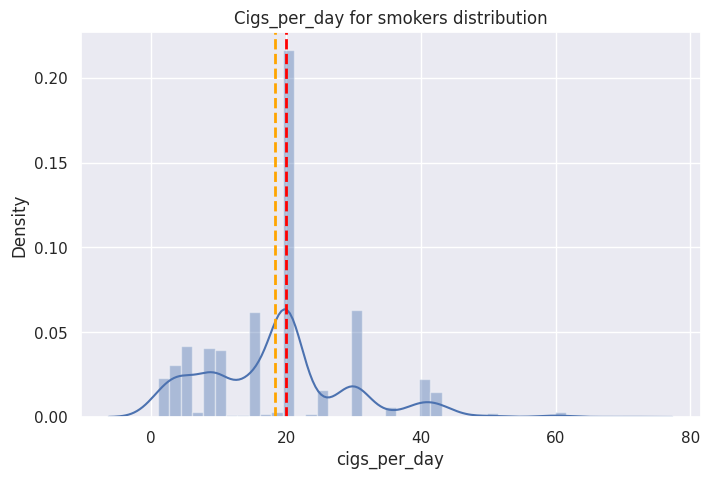

In [ ]:
# distribution of number of cigarettes per day for smokers (excluding non-smokers)
plt.figure(figsize=(8,5))
sns.distplot(df[df['is_smoking']=="YES"]['cigs_per_day'])
plt.axvline(df[df['is_smoking']=="YES"]['cigs_per_day'].mean(), color='orange', linestyle='dashed', linewidth=2)
plt.axvline(df[df['is_smoking']=="YES"]['cigs_per_day'].median(), color='red', linestyle='dashed', linewidth=2)
plt.title('Cigs_per_day for smokers distribution')
plt.show()

<Axes: >

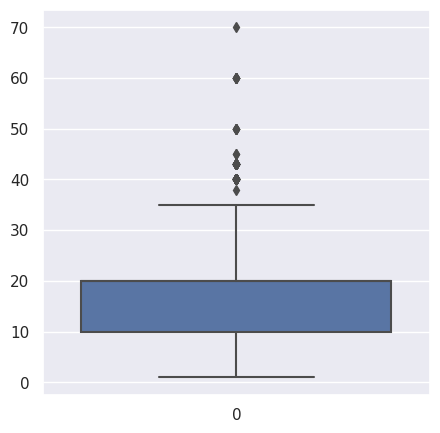

In [ ]:
# box plot for the number of cigarettes per day for smokers (excluding non-smokers)
plt.figure(figsize=(5,5))
sns.boxplot(df[df['is_smoking']=="YES"]['cigs_per_day'])

As the number of cigarettes smoked by the patients who smoke, contains some outliers so we cant use mean to replace the missing values. the missing values in ths cigs_per_day column can be replaced with its median value.

In [ ]:
df['cigs_per_day'] = df['cigs_per_day'].fillna(df[df['is_smoking']=="YES"]['cigs_per_day'].median())

In [ ]:
#converting this column into label (1,0)
df['is_smoking'] = np.where(df['is_smoking'] == 'YES',1,0)

###Variable:sex

In [ ]:
#Label Encoding Categorical columns sex and is_smoking
df['sex'] = df['sex'].apply(lambda x: 1 if x=='M' else 0)


###Variable: total_cholestrol, bmi, heart_rate

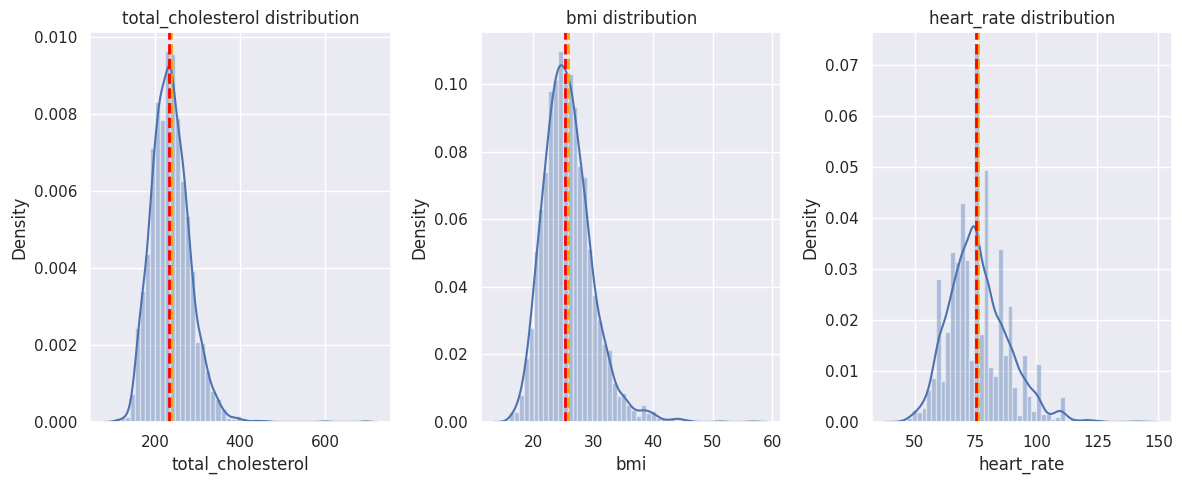

In [ ]:

variables = ['total_cholesterol', 'bmi', 'heart_rate']
num_plots = len(variables)

plt.figure(figsize=(12, 5))  # Adjust the figure size as needed

for idx, i in enumerate(variables):
    plt.subplot(1, num_plots, idx + 1)
    sns.distplot(df[i])
    plt.axvline(df[i].mean(), color='orange', linestyle='dashed', linewidth=2)
    plt.axvline(df[i].median(), color='red', linestyle='dashed', linewidth=2)
    plt.title(i + ' distribution')

plt.tight_layout()  # To ensure proper spacing between subplots
plt.show()

we see from graph all 3 column data is Positively skewed.

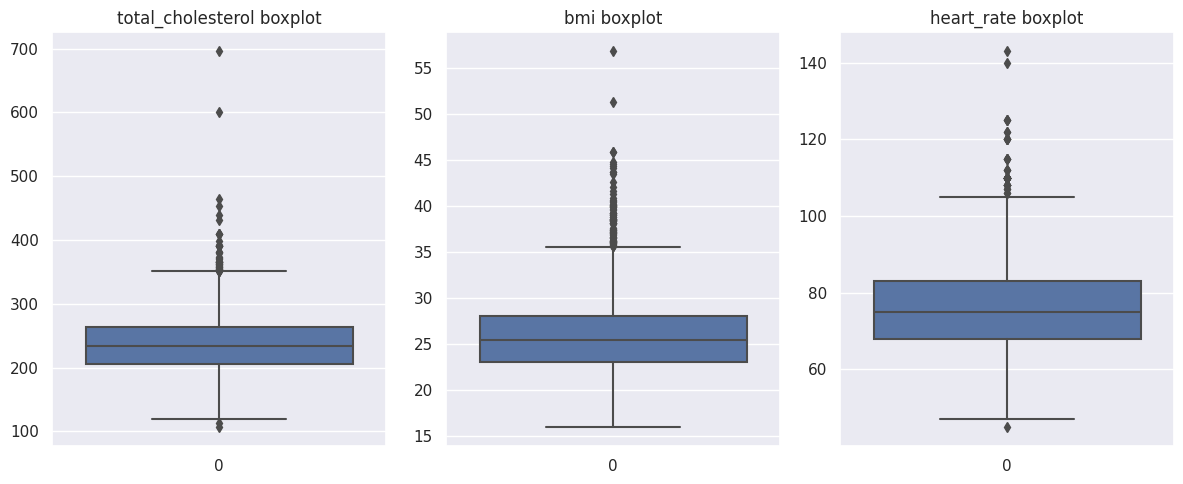

In [ ]:

# Checking outliers in total_cholesterol, bmi, heart_rate columns
var2=['total_cholesterol','bmi','heart_rate']
num_plots = len(var2)

plt.figure(figsize=(12, 5))

for idx, i in enumerate(var2):
  plt.subplot(1, num_plots, idx + 1)
  sns.boxplot(df[i])
  plt.title(i+' boxplot')

plt.tight_layout()  # To ensure proper spacing between subplots
plt.show()

All 3 columns contain the outliers

In [ ]:
# Mean and median for total_cholesterol
df.total_cholesterol.mean(),df.total_cholesterol.median()

(237.07428400954655, 234.0)

In [ ]:
df.bmi.mean(), df.bmi.median()

(25.7949644549763, 25.38)

In [ ]:
df.heart_rate.mean(), df.heart_rate.median()

(75.97727943346119, 75.0)

Here we see the data is positively skewed as well it has many outliers so it will be good to use median for all missing values from this tables.

In [ ]:
# Imputing missing values in the total_cholesterol, bmi, and heart_rate with their medain values
df['total_cholesterol'] = df['total_cholesterol'].fillna(df['total_cholesterol'].median())
df['bmi'] = df['bmi'].fillna(df['bmi'].median())
df['heart_rate'] = df['heart_rate'].fillna(df['heart_rate'].median())

###Variable: Glucose

In [ ]:
df.glucose.isna().sum()

304

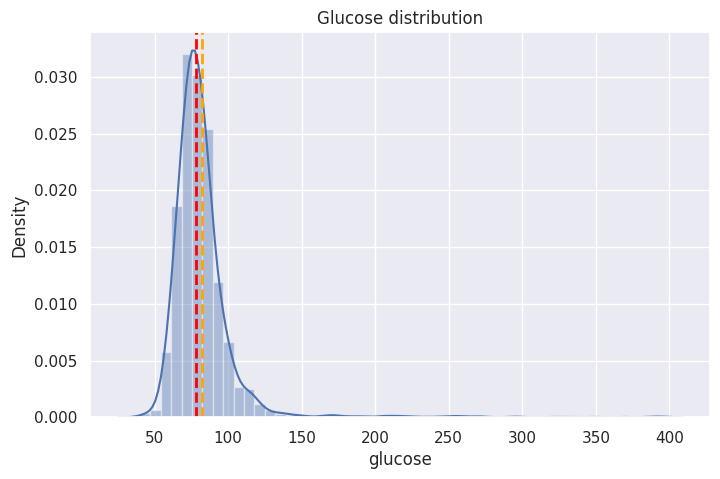

In [ ]:
# distribution of glucose
plt.figure(figsize=(8,5))
sns.distplot(df['glucose'])
plt.axvline(df['glucose'].mean(), color='orange', linestyle='dashed', linewidth=2)
plt.axvline(df['glucose'].median(), color='red', linestyle='dashed', linewidth=2)
plt.title('Glucose distribution')
plt.show()

The glucose is positively skewed

Text(0.5, 1.0, 'Glucose boxplot')

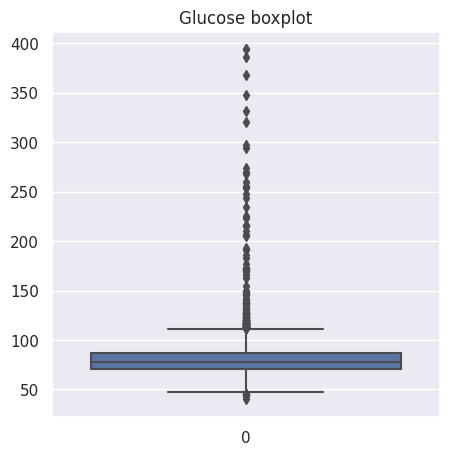

In [ ]:

# Outliers in glucose
plt.figure(figsize=(5,5))
sns.boxplot(df['glucose'])
plt.title('Glucose boxplot')

glucose has many outliers.

In [ ]:
df.glucose.mean(),df.glucose.median(),df.glucose.mode()

(82.08651976668827,
 78.0,
 0    75.0
 Name: glucose, dtype: float64)

-As the glucose is continuous variable, Here 304 nearly 9 to 10 % values of data are missing.

-if we replace those values with mean /median it may create biased data.

-To avoid this we can impute the missing values using KNN imputer.
KNN Imputer is a powerful method for imputation, especially when there is no clear pattern or structure to the missing data.

In [ ]:
# Using KNN imputer with K=10
imputer = KNNImputer(n_neighbors=10)
imputed = imputer.fit_transform(df)
df = pd.DataFrame(imputed, columns=df.columns)

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                3390 non-null   float64
 1   education          3390 non-null   float64
 2   sex                3390 non-null   float64
 3   is_smoking         3390 non-null   float64
 4   cigs_per_day       3390 non-null   float64
 5   bp_meds            3390 non-null   float64
 6   prevalent_stroke   3390 non-null   float64
 7   prevalent_hyp      3390 non-null   float64
 8   diabetes           3390 non-null   float64
 9   total_cholesterol  3390 non-null   float64
 10  systolic_bp        3390 non-null   float64
 11  diastolic_bp       3390 non-null   float64
 12  bmi                3390 non-null   float64
 13  heart_rate         3390 non-null   float64
 14  glucose            3390 non-null   float64
 15  ten_year_chd       3390 non-null   float64
dtypes: float64(16)
memory us

###What all manipulations have you done and insights you found?

For categorical variable: replaced the null values with mode values

For Continuos variable:

-Total_cholestrol, BMI, hearRate: replaced the null values with median values

-cigsPerDay : replaced the null values with median value of people who smoke

-glucose : To avoid bias due to high number of null values, replaced null values with KNN Imputer.

In [ ]:
# changing datatypes
df = df.astype({'age': int, 'education':int,'sex':int,'is_smoking':int,'cigs_per_day':int,
               'bp_meds':int,'prevalent_stroke':int,'prevalent_hyp':int,'diabetes':int,
               'total_cholesterol':float,'systolic_bp':float,'diastolic_bp':float,
               'bmi':float,'heart_rate':float,'glucose':float,'ten_year_chd':int})

In [ ]:
df.head()

,age,education,sex,is_smoking,cigs_per_day,bp_meds,prevalent_stroke,prevalent_hyp,diabetes,total_cholesterol,systolic_bp,diastolic_bp,bmi,heart_rate,glucose,ten_year_chd
0,64,2,0,1,3,0,0,0,0,221.0,148.0,85.0,25.38,90.0,80.0,1
1,36,4,1,0,0,0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,1,0,1,10,0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1,1,1,20,0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,1,0,1,30,0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


All the values in dataset are converted into numbers

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

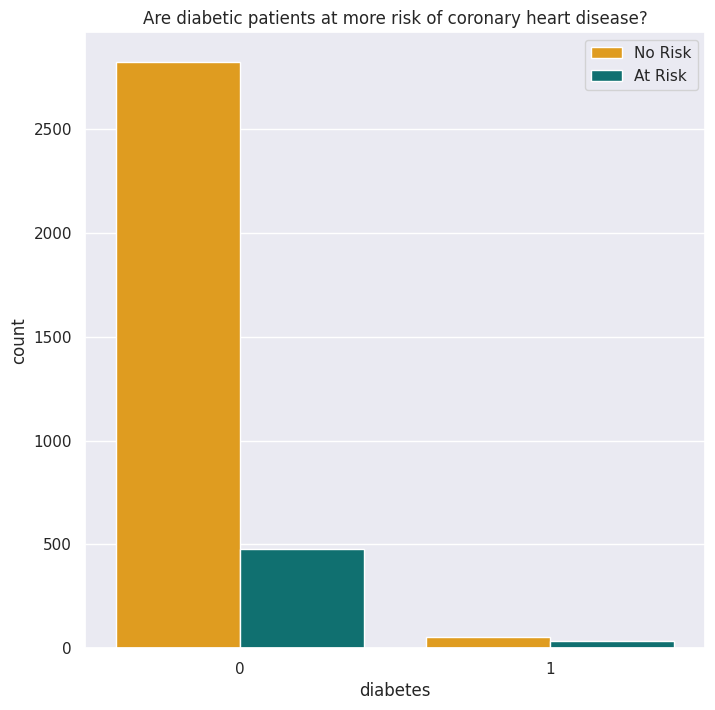

In [ ]:
# Chart - 1 visualization code
my_palette = {0 : 'orange' , 1 : 'teal'}
plt.figure(figsize = (8,8))
sns.countplot(x = df['diabetes'], hue = df['ten_year_chd'], palette = my_palette)
plt.title("Are diabetic patients at more risk of coronary heart disease?")
plt.legend(['No Risk','At Risk'])
plt.show()

The diebetic petients are at risk to cardiovascular risk.

 here diebetic patient count is very less as compaired to normal but diebetic patients are having 50 % chances of getting the risk.

#### Chart - 2

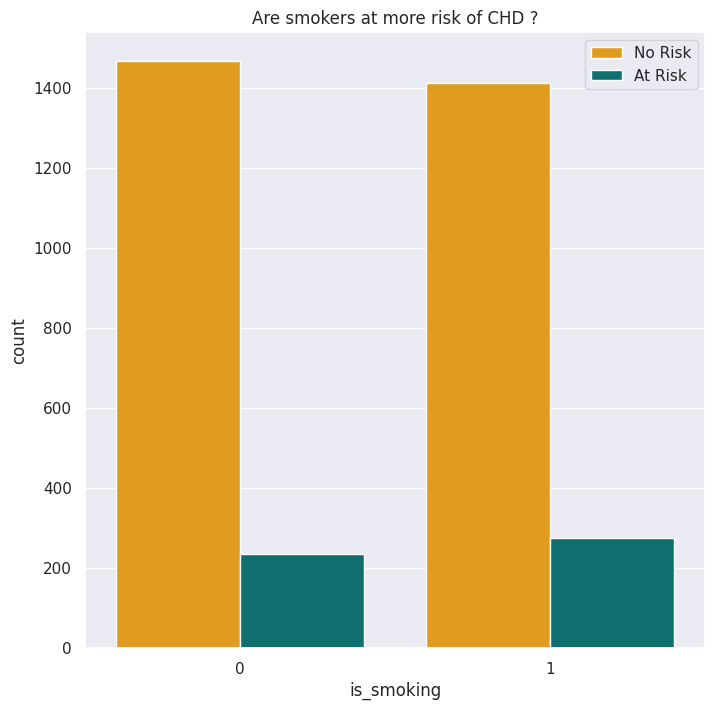

In [ ]:
# Chart - 2 visualization code
my_palette = {0 : 'orange' , 1 : 'teal'}
plt.figure(figsize = (8,8))
sns.countplot(x = df['is_smoking'], hue = df['ten_year_chd'], palette = my_palette)
plt.title("Are smokers at more risk of CHD ?")
plt.legend(['No Risk','At Risk'])
plt.show()

number of smokers at risk are slightly more than non smokers at risk of CHD.

#### Chart - 3

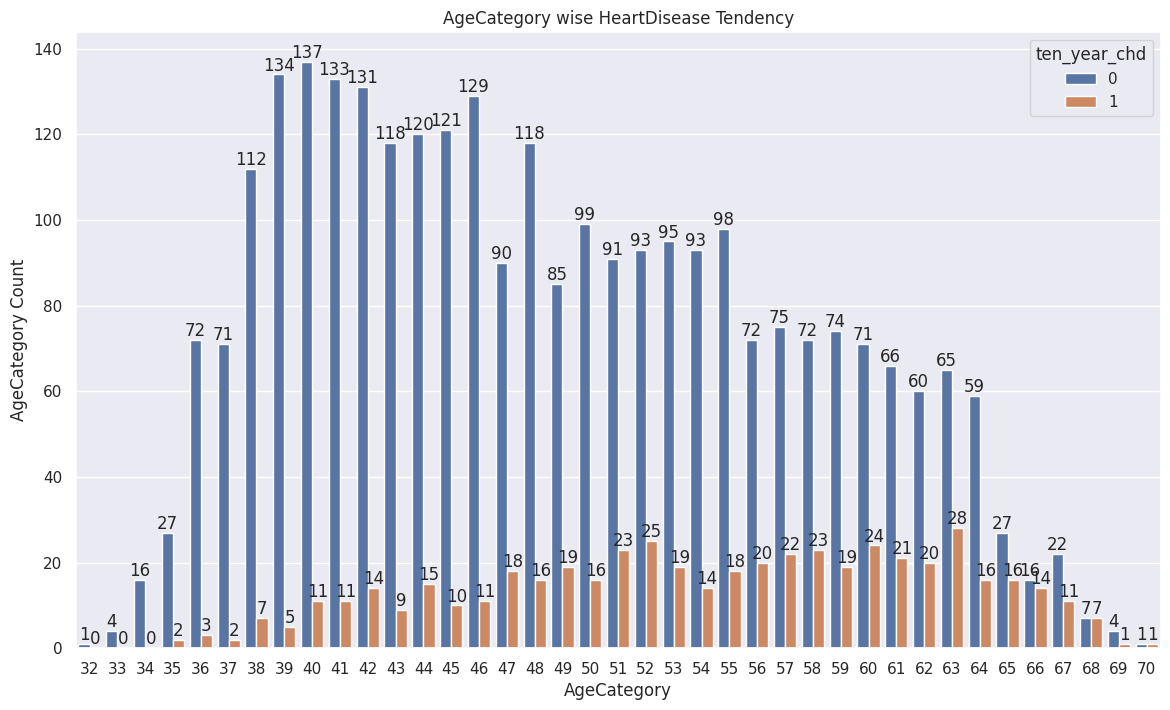

In [ ]:
# Chart - 3 visualization code
plt.figure(figsize=(14,8))
ax=sns.countplot(x='age', hue='ten_year_chd', data=df)
ax.set_xlabel( "AgeCategory")
ax.set_ylabel( "AgeCategory Count")
ax.set_title(  "AgeCategory wise HeartDisease Tendency")
for i in ax.containers:
  ax.bar_label(i)
plt.show()

Here we see the age wise count of peoples having CHD. the age between 51-63 having more risk of CHD

#### Chart - 4

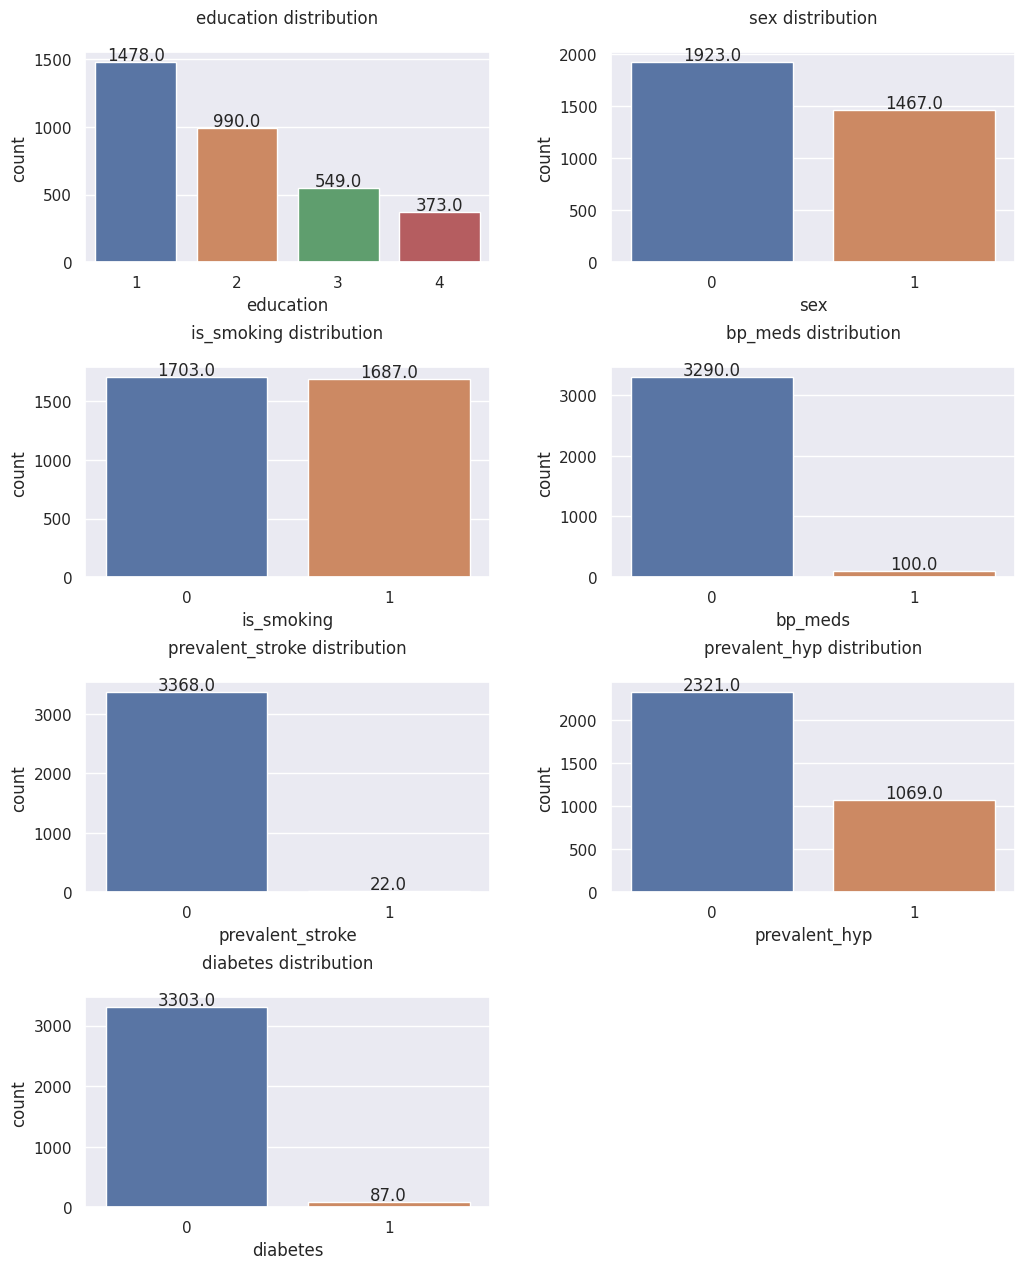

In [ ]:
import seaborn as sns

# Assuming you have imported the required libraries and loaded your DataFrame 'df'
# Also, make sure you have the list of categorical variables as 'categorical_var'

num_plots = len(categorical_var)
num_rows = 4
num_cols = 2

fig, axs = plt.subplots(num_rows, num_cols, figsize=(12,15))

# Add space between each plot
plt.subplots_adjust(hspace=0.5, wspace=0.3)

for idx, i in enumerate(categorical_var):
    row = idx // num_cols
    col = idx % num_cols
    p = sns.countplot(data=df, x=i, ax=axs[row, col])
    axs[row, col].set_xlabel(i)
    axs[row, col].set_title(i + ' distribution'+ '\n')
    for patch in p.patches:
        p.annotate(f'{patch.get_height()}', (patch.get_x() + patch.get_width() / 2., patch.get_height()), ha='center', va='center', xytext=(0,5), textcoords='offset points')

# To remove any extra empty subplots if there are fewer categorical variables than the grid size
for i in range(len(categorical_var), num_rows * num_cols):
    fig.delaxes(axs.flatten()[i])


Summary:

Majority of the patients belong to the education level 1, followed by 2, 3, and 4 respectively.

There are more female patients compared to male patients.

Almost half the patients are smokers.

100 patients under the study are undertaking blood pressure medication.

22 patients under the study have experienced a stroke.

1069 patients have hypertension.

87 patients have diabetes.

#### Chart - 5

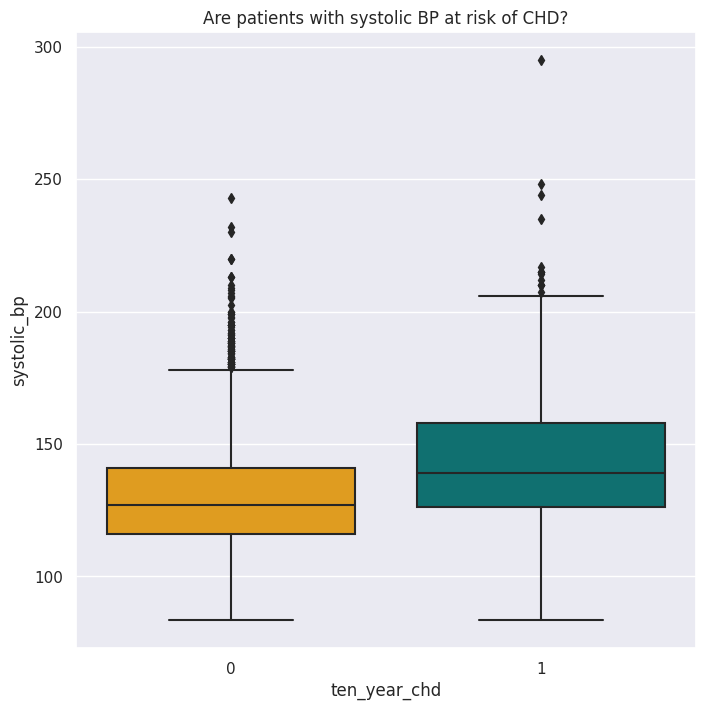

In [ ]:
# Chart - 5 visualization code

plt.figure(figsize=(8, 8))
sns.boxplot(x='ten_year_chd', y='systolic_bp', data=df, palette=my_palette)
plt.title("Are patients with systolic BP at risk of CHD?")
plt.show()

#### Chart - 6

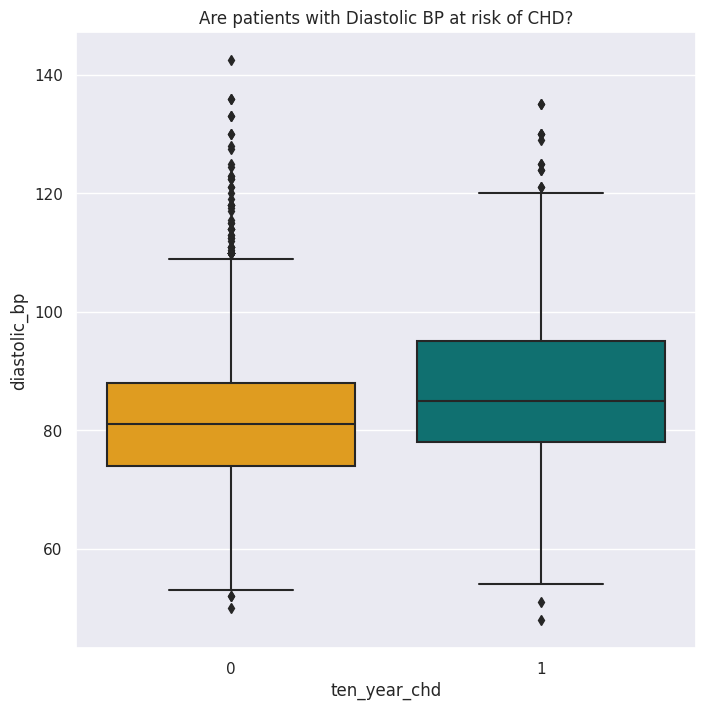

In [ ]:
# Chart - 6 visualization code
plt.figure(figsize = (8,8))
sns.boxplot(x='ten_year_chd',y='diastolic_bp', data=df, palette = my_palette)
plt.title("Are patients with Diastolic BP at risk of CHD?")
plt.show()

considering both graphs both systolic BP and distolic BP playes important role in heart risk. but higher systolic BP results inn slightly more risk in CHD.

#### Chart - 7

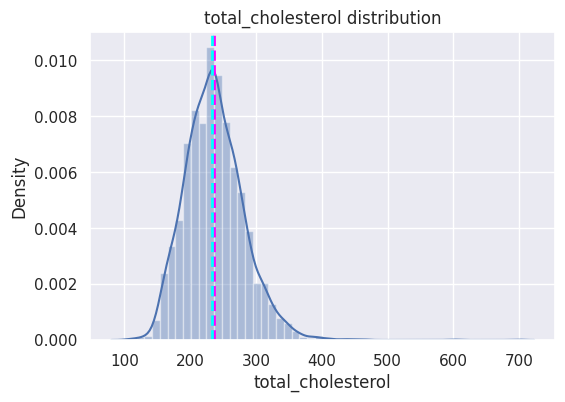

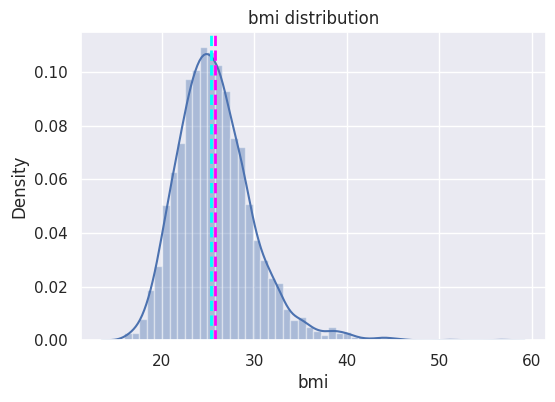

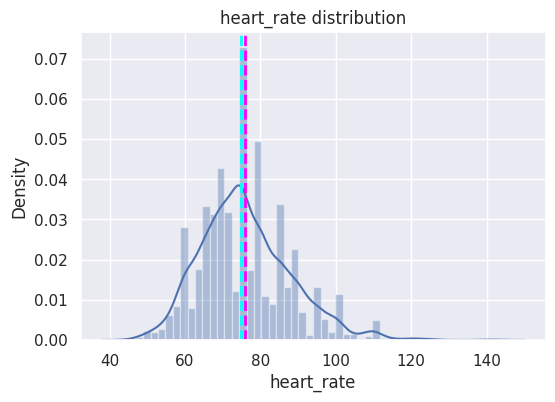

In [ ]:
# Chart - 7 visualization code
for i in ['total_cholesterol','bmi','heart_rate']:
  plt.figure(figsize=(6,4))
  sns.distplot(df[i])
  plt.axvline(df[i].mean(), color='magenta', linestyle='dashed', linewidth=2)
  plt.axvline(df[i].median(), color='cyan', linestyle='dashed', linewidth=2)
  plt.title(i+' distribution')
  plt.show()

#### Chart - 8

In [ ]:
# Chart - 8 visualization code
def heartRate_data(row):
    if row['heart_rate'] <= 59:
        value = 'Low'
    elif row['heart_rate'] < 100:
        value = 'Normal'
    else:
        value = "High"

    return value

In [ ]:

df['heartRateLabel'] = df.apply(heartRate_data, axis = 1)

In [ ]:
df['heartRateLabel'].value_counts

<bound method IndexOpsMixin.value_counts of 0       Normal
1       Normal
2       Normal
3       Normal
4       Normal
         ...  
3385    Normal
3386    Normal
3387    Normal
3388    Normal
3389    Normal
Name: heartRateLabel, Length: 3390, dtype: object>

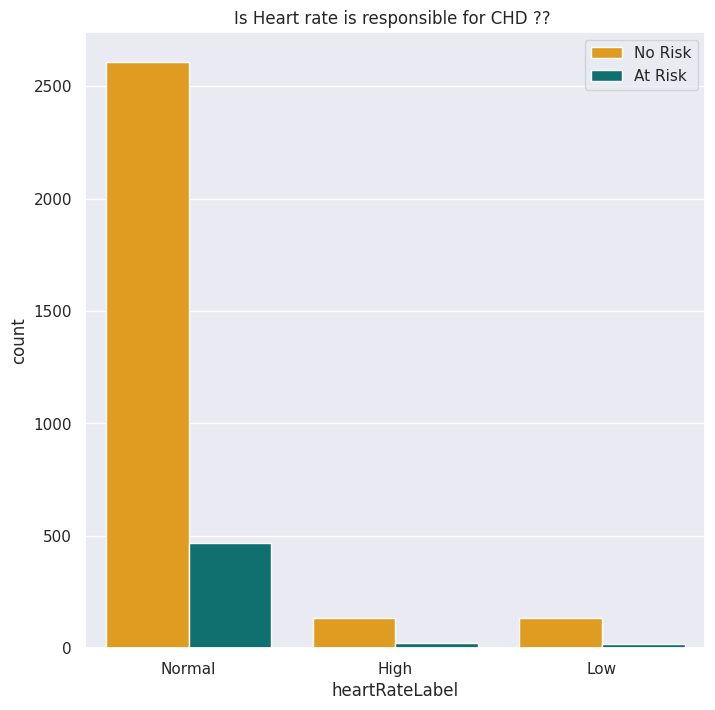

In [ ]:
plt.figure(figsize = (8,8))
my_palette = {0 : 'orange' , 1 : 'teal'}
sns.countplot(x = df['heartRateLabel'], hue = df['ten_year_chd'], palette = my_palette)
plt.title("Is Heart rate is responsible for CHD ?? ")
plt.legend(['No Risk','At Risk'])
plt.show()


normally high heart rate patients are at more risk of CHD.

#### Chart - 9

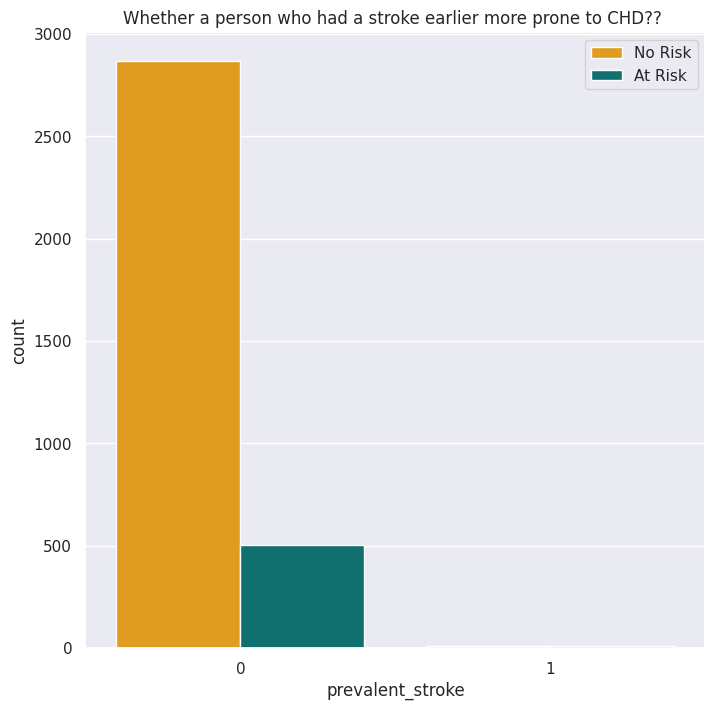

In [ ]:
# Chart - 9 visualization code
plt.figure(figsize = (8,8))
my_palette = {0 : 'orange' , 1 : 'teal'}
sns.countplot(x = df['prevalent_stroke'], hue = df['ten_year_chd'], palette = my_palette)
plt.title("Whether a person who had a stroke earlier more prone to CHD?? ")
plt.legend(['No Risk' , 'At Risk'])
plt.show()


the person having prevalent stroke is less likely to have CHD again.

#### Chart - 14 - Correlation Heatmap

<Axes: title={'center': 'Correlation Analysis'}>

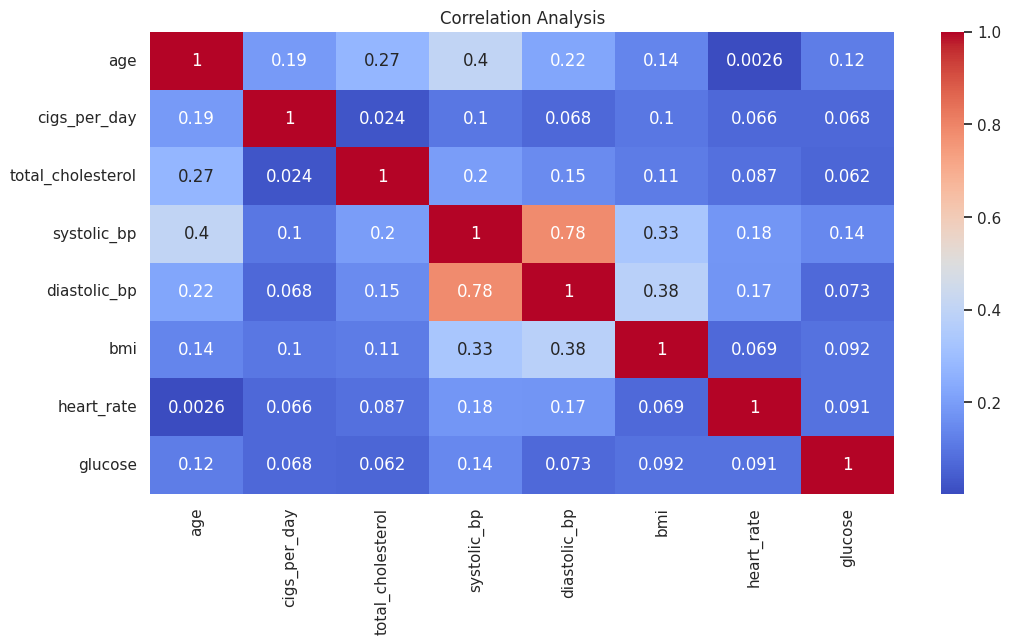

In [ ]:
# Correlation Heatmap visualization code

# Updated correlations
plt.figure(figsize=(12,6))
plt.title('Correlation Analysis')
correlation = df[continuous_var].corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')


## ***4.Hypothesis Testing***

To check whether discrete variables are related, chi2 test can be used. We define:

Null Hypothesis (H0): Two variables are independent.

Alternate Hypothesis (H1): Two variables are not independent.


We can use Chi2 test to get a p-value and check if a categorical variable is dependent or independent to the dependent variable. If the p value obtained is greater than 0.05 then we reject the null hypothesis, and accept the alternate hypothesis.

In [ ]:
# chi2 scores
chi_scores = chi2(df[categorical_var],df[dependent_var])
chi_scores

(array([ 4.76184162, 13.77838959, 25.10243827, 15.8619983 , 64.37770831,
        35.50630598]),
 array([2.90973990e-02, 2.05688680e-04, 5.43640748e-07, 6.81331780e-05,
        1.02713702e-15, 2.54226209e-09]))

In [ ]:
# P values for discrete features
p_values = pd.Series(chi_scores[1],index = df[categorical_var].columns)
p_values.sort_values(ascending = False , inplace = True)
p_values

education           2.909740e-02
sex                 2.056887e-04
prevalent_stroke    6.813318e-05
bp_meds             5.436407e-07
diabetes            2.542262e-09
prevalent_hyp       1.027137e-15
dtype: float64

<Axes: title={'center': 'P-value for discrete features'}>

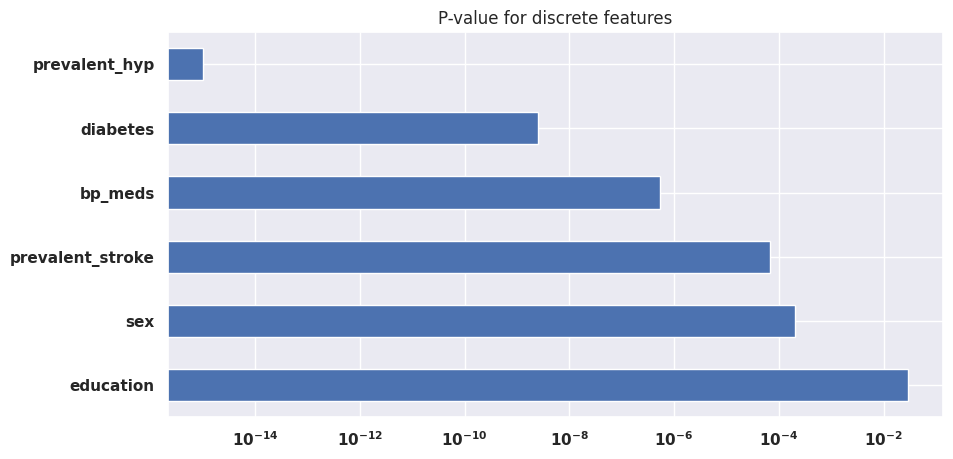

In [ ]:
# Plotting p values for chi2 test for discrete features
plt.figure(figsize=(10,5))
plt.xscale('log')
plt.xlabel('P-value')
plt.title('P-value for discrete features')
p_values.plot.barh()


the conclusion is that we reject the null hypothesis for all variables, indicating that they are not independent and have a significant association with the dependent variable.

## ***5.Feature Engineering***

###handling muticoliniarity


The variables systolic BP and diastolic BP are highly correlated.

In [ ]:
print(df['systolic_bp'].min(),df['systolic_bp'].max())
print(df['diastolic_bp'].min(),df['diastolic_bp'].max())

83.5 295.0
48.0 142.5


will create new varible

Pulse Pressure = Systolic BP - Diastolic BP

In [ ]:

# Creating a new column pulse_pressure
# and dropping systolic_bp and diastolic_bp

df['pulse_pressure'] = df['systolic_bp']-df['diastolic_bp']
df.drop('systolic_bp',axis=1,inplace=True)
df.drop('diastolic_bp',axis=1,inplace=True)

In [ ]:
df.columns

Index(['age', 'education', 'sex', 'is_smoking', 'cigs_per_day', 'bp_meds',
       'prevalent_stroke', 'prevalent_hyp', 'diabetes', 'total_cholesterol',
       'bmi', 'heart_rate', 'glucose', 'ten_year_chd', 'heartRateLabel',
       'pulse_pressure'],
      dtype='object')

In [ ]:
continuous_var.remove('systolic_bp')
continuous_var.remove('diastolic_bp')
continuous_var.append('pulse_pressure')


Text(0.5, 1.0, 'Pulse Pressure Distribution')

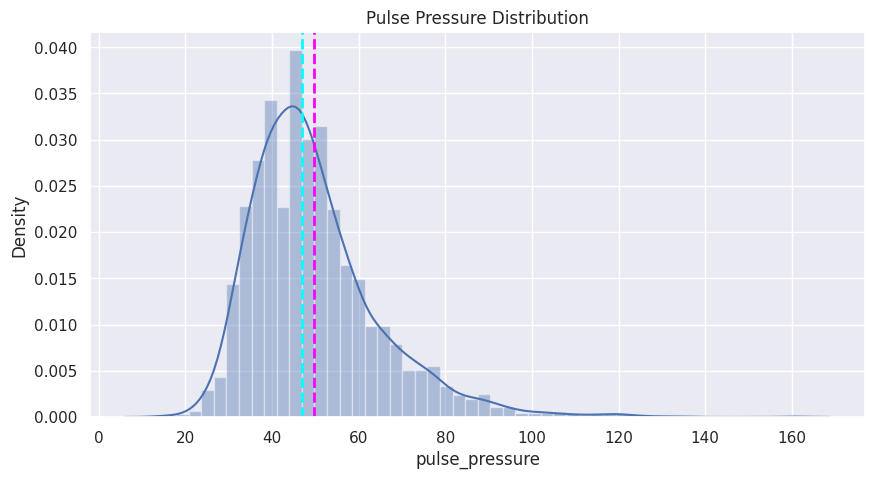

In [ ]:
# Analyzing the distribution of pulse_pressure
plt.figure(figsize=(10,5))
sns.distplot(df['pulse_pressure'])
plt.axvline(df['pulse_pressure'].mean(), color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(df['pulse_pressure'].median(), color='cyan', linestyle='dashed', linewidth=2)
plt.title('Pulse Pressure Distribution')


pulse pressure is positively skewed data

In [ ]:
# dropping is_smoking
df.drop('is_smoking',axis=1,inplace=True)

In [ ]:
df.drop(columns=['heartRateLabel'], inplace=True)

In [ ]:
# dropping is smoking
categorical_var.remove('is_smoking')
categorical_var

['education',
 'sex',
 'bp_meds',
 'prevalent_stroke',
 'prevalent_hyp',
 'diabetes']

###outlier analysis


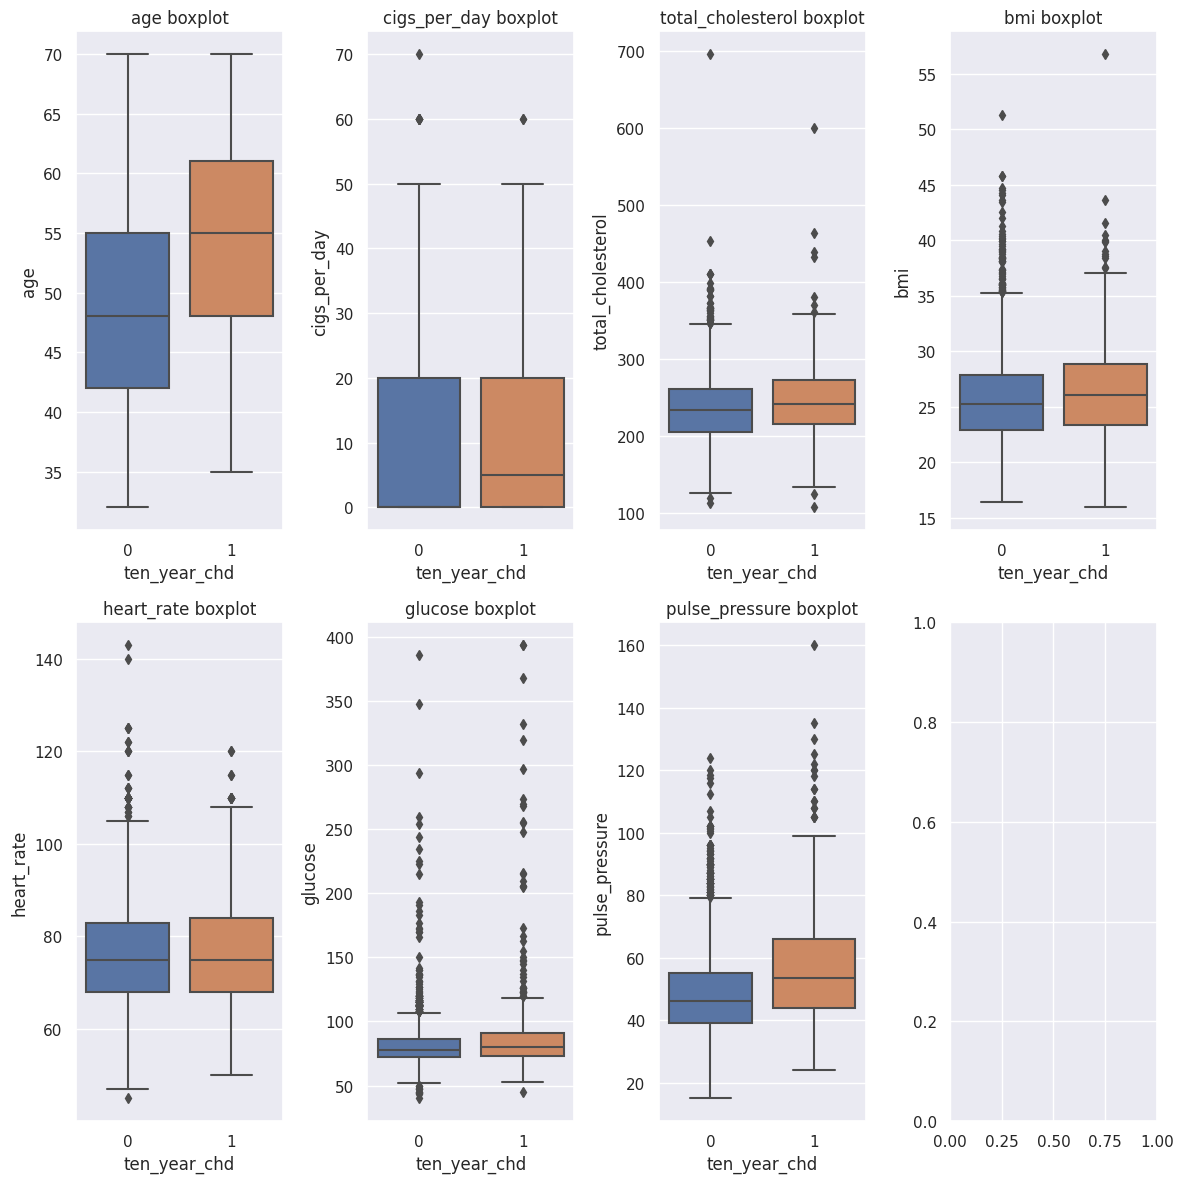

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(12,12))

# Flattening the axes for easier iteration
axes = axes.flatten()

# Looping through each continuous variable and plotting the boxplot
for i, col in enumerate(continuous_var):
    sns.boxplot(y=col, x=dependent_var[0], data=df, ax=axes[i])
    axes[i].set_title(col + ' boxplot')

# Tight layout to avoid overlapping titles and labels
plt.tight_layout()
plt.show()

here are outliers in the data, the effect of the outliers can be reduced to some extent by transforming it.
Once the data is transformed, if outliers beyond 3 standard deviations from the mean still remain, then they can be imputed with its respective median value.
This is done on the train data only to prevent data leakage.

In [ ]:
old_df= df.copy()

In [ ]:
# skewness along the index axis
(df[continuous_var]).skew(axis = 0)

age                  0.225796
cigs_per_day         1.204077
total_cholesterol    0.948170
bmi                  1.025551
heart_rate           0.676660
glucose              6.361911
pulse_pressure       1.412382
dtype: float64

In [ ]:
np.log10(df[continuous_var]+1).skew(axis = 0)

age                 -0.015053
cigs_per_day         0.275072
total_cholesterol    0.011860
bmi                  0.370422
heart_rate           0.165898
glucose              2.310918
pulse_pressure       0.354174
dtype: float64

We can clearly see that by log transformation of the continuous variables, we are able to reduce it's skew to some extent.

* Logarithmic transformation can help to normalize data that has a skewed distribution.Taking the log of the data can reduce the impact of extreme values, making the data distribution more symmetric.

In [ ]:
# Implementing log transformation on continuous variables

df['age']                   = np.log10(df['age']+1)
df['cigs_per_day']          = np.log10(df['cigs_per_day']+1)
df['total_cholesterol']     = np.log10(df['total_cholesterol']+1)
df['bmi']                   = np.log10(df['bmi']+1)
df['heart_rate']            = np.log10(df['heart_rate']+1)
df['glucose']               = np.log10(df['glucose']+1)
df['pulse_pressure']        = np.log10(df['pulse_pressure']+1)

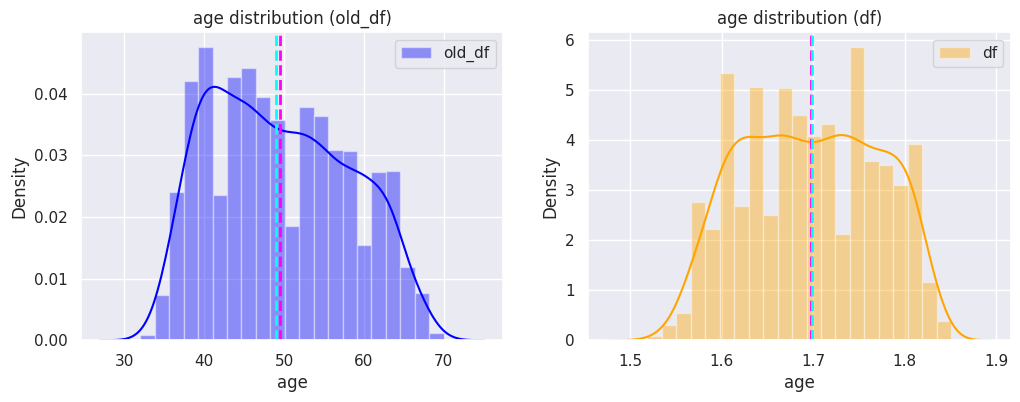

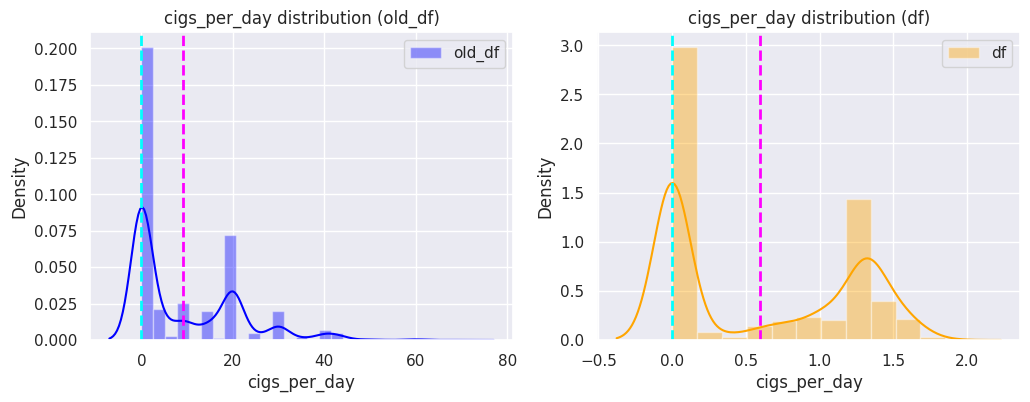

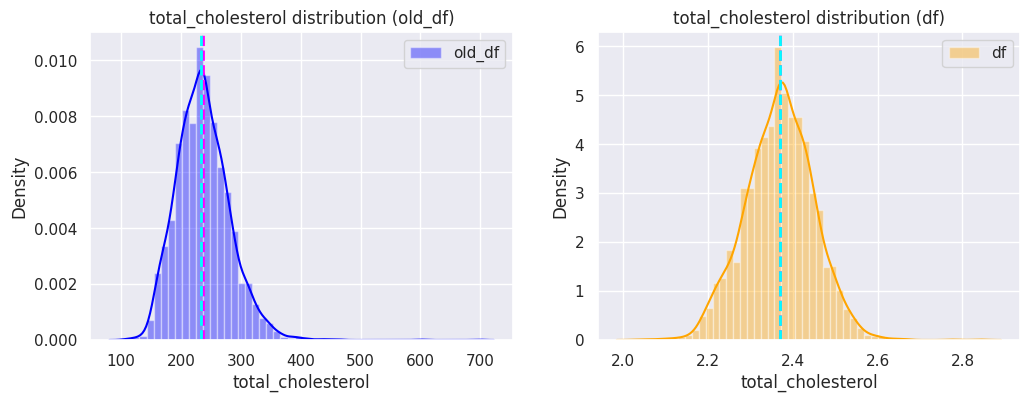

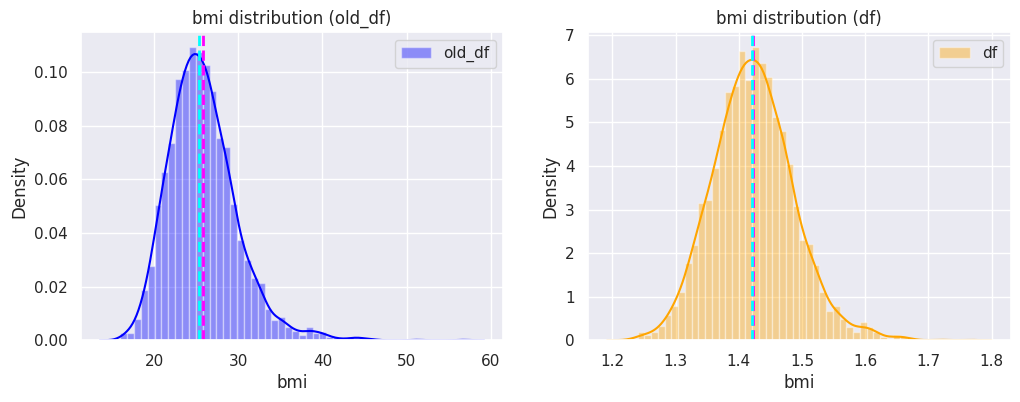

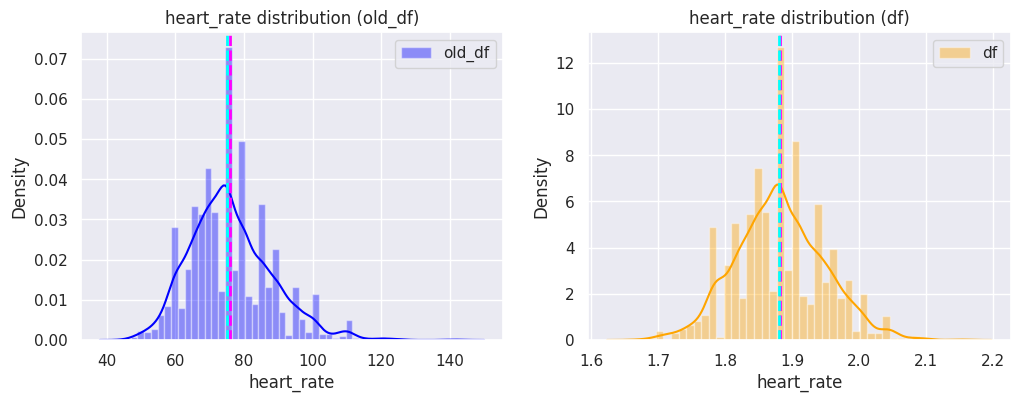

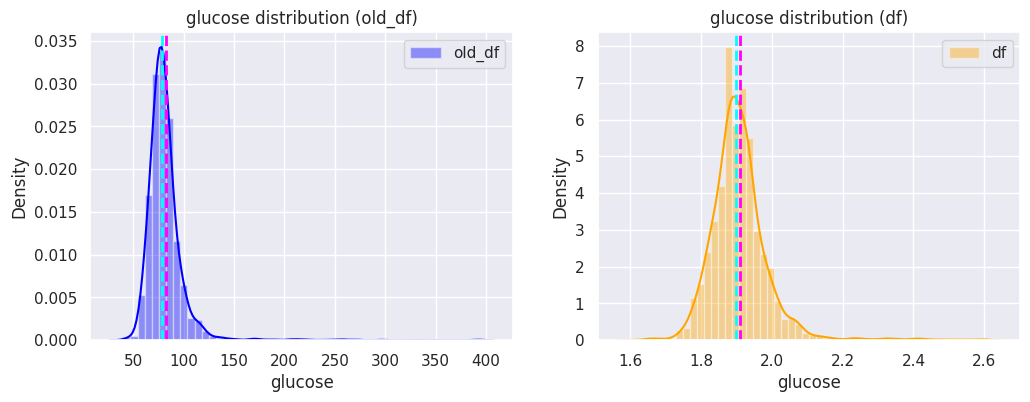

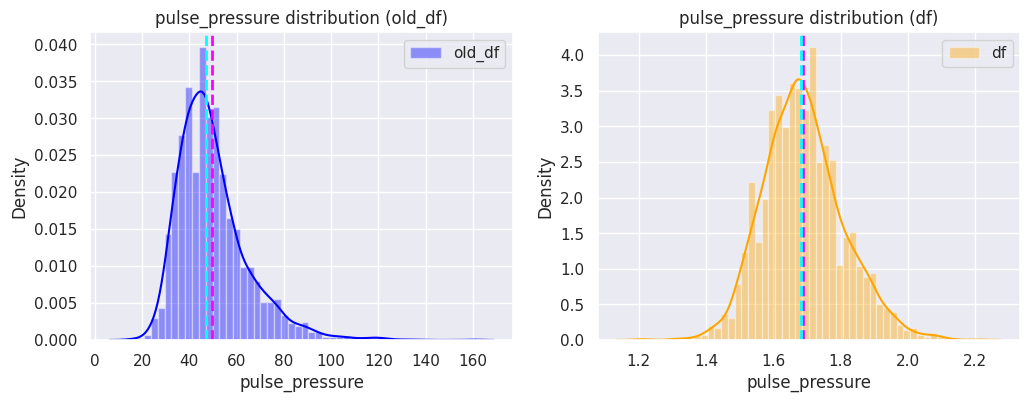

In [ ]:
for col in continuous_var:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))  # Create a figure with two subplots side by side

    sns.distplot(old_df[col], ax=axes[0], label='old_df', color='blue')  # Plot on the first subplot
    sns.distplot(df[col], ax=axes[1], label='df', color='orange')        # Plot on the second subplot

    axes[0].axvline(old_df[col].mean(), color='magenta', linestyle='dashed', linewidth=2)  # Add mean line to the first subplot
    axes[0].axvline(old_df[col].median(), color='cyan', linestyle='dashed', linewidth=2) # Add median line to the first subplot

    axes[1].axvline(df[col].mean(), color='magenta', linestyle='dashed', linewidth=2)     # Add mean line to the second subplot
    axes[1].axvline(df[col].median(), color='cyan', linestyle='dashed', linewidth=2)      # Add median line to the second subplot

    axes[0].set_title(col + ' distribution (old_df)')  # Set title for the first subplot
    axes[1].set_title(col + ' distribution (df)')      # Set title for the second subplot

    axes[0].legend()  # Show legend for the first subplot
    axes[1].legend()  # Show legend for the second subplot

    plt.show()

Except cigs_per_day, we have successfully been able to reduce the skewness in the continuous variables. Now these distributions are closer to symmetric distribution.

##preprocessing


In [ ]:
# Defining dependent and independent variables
X = df.drop('ten_year_chd',axis=1)
y = df[dependent_var]

###Evalution metrices


Since the data we are dealing with is unbalanced, accuracy may not be the best evaluation metric to evaluate the model performance.

Also, since we are dealing with data related to healthcare, False Negatives are of higher concern than False Positive
In other words, it doesn’t matter whether we raise a false alarm but the actual positive cases should not go undetected

Recall = TP / (TP + FN)

where:

* TP (True Positives) is the number of instances that are correctly classified as positive by the model.
* FN (False Negatives) is the number of instances that are actually positive but are misclassified as negative by the model.


In [ ]:

# function to get recall score
def recall(actual,predicted):
  '''
  recall(actual,predicted)
  '''
  return recall_score(y_true=actual, y_pred=predicted, average='binary')

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y, shuffle=True)

In [ ]:
y_train.value_counts() , y_test.value_counts()

(ten_year_chd
 0               2015
 1                358
 dtype: int64,
 ten_year_chd
 0               864
 1               153
 dtype: int64)

The train and test set contain almost equal proportion of results.

Since the data is imbalanced, stratified split was employed to get almost equal proportion of dependent variables in the train and test sets.

In a stratified split, the dataset is divided into subsets in such a way that each subset maintains the same proportion of classes as the original dataset.

### 9. Handling Imbalanced Dataset

As considering normal distribution Imputing the outliers in 'total_cholesterol', 'bmi', 'heart_rate', 'glucose', 'pulse_pressure' beyond 3 standard deviations from the mean with its median value.

In [ ]:
# Handling Imbalanced Dataset (If needed)
for i in ['total_cholesterol', 'bmi', 'heart_rate', 'glucose','pulse_pressure']:
  upper_lim = X_train[i].mean() + 3 * X_train[i].std()
  lower_lim = X_train[i].mean() - 3 * X_train[i].std()

  #data other than upper and lower limit is replaced by median
  X_train.loc[(X_train[i] > upper_lim),i] = X_train[i].median()
  X_train.loc[(X_train[i] < lower_lim),i] = X_train[i].median()


In [ ]:
X_train[continuous_var].skew(axis = 0)

age                 -0.035936
cigs_per_day         0.297586
total_cholesterol   -0.046628
bmi                  0.215412
heart_rate           0.074472
glucose              0.379615
pulse_pressure       0.270388
dtype: float64

Almost all the values are close to zero. We were successsful in handling outliers in the train data, and thereby reducing skew.

###oversampling

<Axes: title={'center': 'Target variable before SMOTE'}, xlabel='ten_year_chd'>

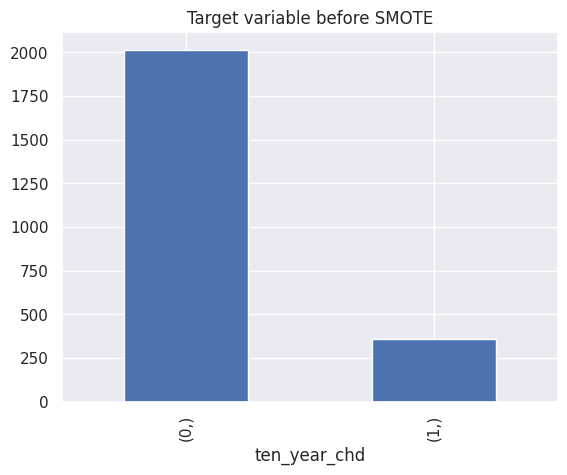

In [ ]:
y_train.value_counts().plot(kind='bar', title='Target variable before SMOTE')

Since we are dealing with unbalanced data, ie, only ~15% of the patients were diagnosed with coronary heart disease, we oversample the train dataset using SMOTE (Synthetic Minority Oversampling Technique).

In [ ]:
X_train

,age,education,sex,cigs_per_day,bp_meds,prevalent_stroke,prevalent_hyp,diabetes,total_cholesterol,bmi,heart_rate,glucose,pulse_pressure
2104,1.799341,3,1,1.322219,0,0,0,0,2.390935,1.389166,1.863323,1.869232,1.690196
179,1.716003,1,1,1.491362,0,0,0,0,2.382017,1.474944,1.851258,1.832509,1.681241
306,1.763428,1,1,1.322219,0,0,0,0,2.424882,1.465085,1.869232,2.004321,1.643453
659,1.806180,1,0,0.000000,0,0,1,0,2.558709,1.451940,1.934498,2.017033,1.832509
1924,1.732394,1,0,1.322219,0,0,0,0,2.385606,1.314710,1.851258,1.875061,1.690196
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1490,1.748188,3,0,0.000000,0,0,0,0,2.416641,1.421768,1.880814,1.785330,1.698970
1566,1.748188,1,0,0.000000,0,0,1,0,2.269513,1.430398,1.897627,1.959041,1.755875
1870,1.612784,1,1,1.322219,0,0,0,0,2.305351,1.482588,1.875061,1.977724,1.662758
1723,1.591065,2,0,0.000000,0,0,0,0,2.204120,1.465532,1.845098,1.886491,1.681241


In [ ]:
# Oversampling using SMOTE
smote = SMOTE()

# fit predictor and target variable
X_smote, y_smote = smote.fit_resample(X_train, y_train)

print('Samples in the original dataset', len(y_train))
print('Samples in the resampled dataset', len(y_smote))


Samples in the original dataset 2373
Samples in the resampled dataset 4030


<Axes: title={'center': 'Target variable after SMOTE'}, xlabel='ten_year_chd'>

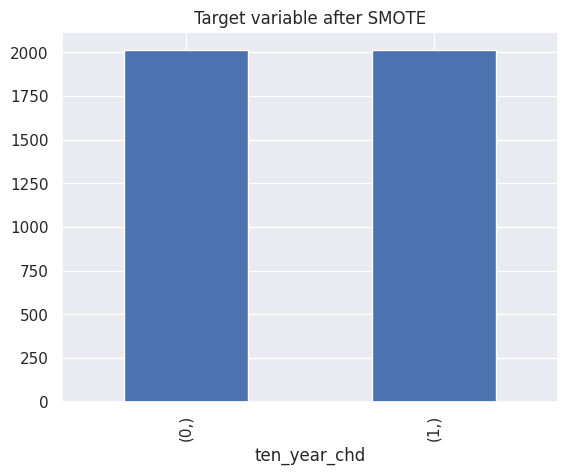

In [ ]:
# visualize the target variable after SMOTE
y_smote.value_counts().plot(kind='bar', title='Target variable after SMOTE')

We have successfully oversampled the minority class using SMOTE. Now the model we build will be able to learn from both the classes without any bias.

##scaling

Since the predictions from the distance based models will get affected if the attributes are in different ranges, we need to scale them.

We can use StandardScaler to scale down the variables.
The results obtained from scaling can be stored and used while building those models.

Tree algorithms do not necessarily require scaling.

In [ ]:
# Scaling data
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_smote_scaled = scaler.fit_transform(X_smote)
X_test_scaled = scaler.transform(X_test)

# Converting array to dataframe
X_train_scaled = pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_smote_scaled = pd.DataFrame(X_smote_scaled,columns=X_smote.columns)
X_test_scaled = pd.DataFrame(X_test_scaled,columns=X_test.columns)

In [ ]:
# Scaled train values
X_train_scaled.head()

,age,education,sex,cigs_per_day,bp_meds,prevalent_stroke,prevalent_hyp,diabetes,total_cholesterol,bmi,heart_rate,glucose,pulse_pressure
0,1.352753,1.042877,1.126340,1.152968,-0.178155,-0.087426,-0.685091,-0.171759,0.279319,-0.546622,-0.267146,-0.521222,0.021221
1,0.238381,-0.929033,1.126340,1.418967,-0.178155,-0.087426,-0.685091,-0.171759,0.165020,0.828332,-0.454995,-1.079829,-0.058061
2,0.872536,-0.929033,1.126340,1.152968,-0.178155,-0.087426,-0.685091,-0.171759,0.714396,0.670299,-0.175143,1.533689,-0.392623
3,1.444209,-0.929033,-0.887831,-0.926396,-0.178155,-0.087426,1.459660,-0.171759,2.429594,0.459589,0.841085,1.727057,1.281191
4,0.457551,-0.929033,-0.887831,1.152968,-0.178155,-0.087426,-0.685091,-0.171759,0.211021,-1.740096,-0.454995,-0.432546,0.021221


In [ ]:
# scaled SMOTE values
X_smote_scaled.head()

,age,education,sex,cigs_per_day,bp_meds,prevalent_stroke,prevalent_hyp,diabetes,total_cholesterol,bmi,heart_rate,glucose,pulse_pressure
0,1.190220,1.108479,1.053016,1.115627,-0.18971,-0.072376,-0.811861,-0.177432,0.232811,-0.641082,-0.289460,-0.564222,-0.156119
1,0.014687,-0.871211,1.053016,1.378757,-0.18971,-0.072376,-0.811861,-0.177432,0.109070,0.802732,-0.489249,-1.137767,-0.237235
2,0.683647,-0.871211,1.053016,1.115627,-0.18971,-0.072376,-0.811861,-0.177432,0.703833,0.636785,-0.191608,1.545641,-0.579537
3,1.286696,-0.871211,-0.949653,-0.941311,-0.18971,-0.072376,1.231737,-0.177432,2.560735,0.415522,0.889216,1.744180,1.132999
4,0.245886,-0.871211,-0.949653,1.115627,-0.18971,-0.072376,-0.811861,-0.177432,0.158872,-1.894327,-0.489249,-0.473174,-0.156119


In [ ]:
# scaled test values
X_test_scaled.head()

,age,education,sex,cigs_per_day,bp_meds,prevalent_stroke,prevalent_hyp,diabetes,total_cholesterol,bmi,heart_rate,glucose,pulse_pressure
0,-1.747668,0.118634,1.053016,1.115627,-0.18971,-0.072376,1.231737,-0.177432,0.425660,0.795382,0.458431,-1.548979,-0.762546
1,-0.736381,2.098324,1.053016,0.269236,-0.18971,-0.072376,1.231737,-0.177432,-0.225081,0.916934,-1.820787,0.455130,0.955496
2,-1.441301,0.118634,-0.949653,-0.941311,-0.18971,-0.072376,-0.811861,-0.177432,-1.451970,-1.388100,-0.489249,-0.035415,-0.362134
3,-0.349344,-0.871211,-0.949653,-0.941311,-0.18971,-0.072376,-0.811861,-0.177432,1.012927,0.461854,-0.289460,-0.207144,0.369192
4,-0.871025,0.118634,-0.949653,1.378757,-0.18971,-0.072376,-0.811861,-0.177432,0.232811,-0.325745,-1.124246,0.048846,-0.447659


## ***6. ML Model Implementation***

### ML Model - 1 :Linear Regression

In [ ]:
# ML Model - 1 Implementation
lr_model = LogisticRegression()

# Fit the Algorithm
lr_model.fit(X_smote_scaled, y_smote)

# Predict on the model
lr_train_pred = lr_model.predict(X_smote_scaled)

In [ ]:
# training set recall
lr_train_recall = recall(y_smote,lr_train_pred)
lr_train_recall

0.6779156327543424

In [ ]:
# Test predictions
lr_test_pred = lr_model.predict(X_test_scaled)

# training set recall
lr_test_recall = recall(y_test,lr_test_pred)
lr_test_recall

0.6666666666666666

In [ ]:
# Classification report
print(classification_report(y_test,lr_test_pred))

              precision    recall  f1-score   support

           0       0.92      0.67      0.78       864
           1       0.27      0.67      0.38       153

    accuracy                           0.67      1017
   macro avg       0.59      0.67      0.58      1017
weighted avg       0.82      0.67      0.72      1017



<Figure size 400x400 with 0 Axes>

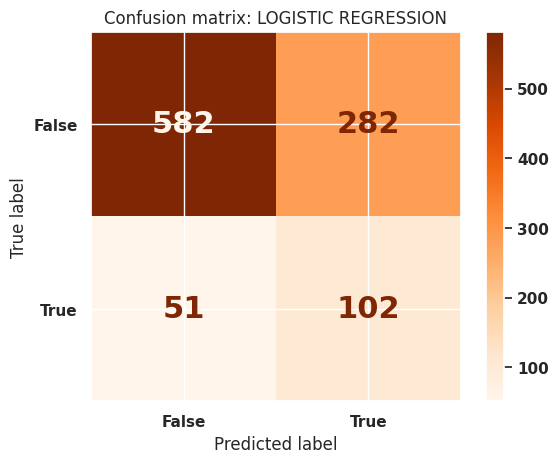

In [ ]:
# Confusion matrix
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import ConfusionMatrixDisplay as cmd
lr_confusion_matrix = cm(y_test, lr_test_pred)
cm_display = cmd(confusion_matrix = lr_confusion_matrix, display_labels = [False, True])

plt.figure(figsize=(4, 4))
font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 22}
plt.rc('font', **font)

cm_display.plot(cmap='Oranges')
plt.title('Confusion matrix: LOGISTIC REGRESSION')
plt.show()

False negatives obtained after using logistic regression: 52

### ML Model - 2 : K nearest neighbours

In [ ]:
# Value of k taken upto sqrt(n)
# Where n is no of records in the train dataset
# sqrt(4030) = 63.48
knn_test_res = []
knn_train_res = []
for k in range(1,65):
  knn_model = KNeighborsClassifier(n_neighbors=k)
  knn_model.fit(X_smote_scaled, y_smote)
  knn_train_pred = knn_model.predict(X_smote_scaled)
  knn_train_recall = recall(y_smote,knn_train_pred)
  knn_test_pred = knn_model.predict(X_test_scaled)
  knn_test_recall = recall(y_test,knn_test_pred)
  knn_test_res.append(knn_test_recall)
  knn_train_res.append(knn_train_recall)

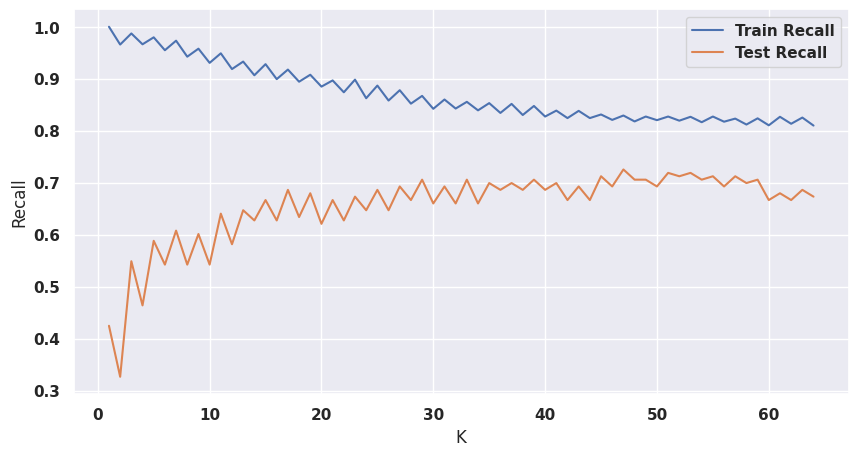

In [ ]:
# Plotting the train and test recalls for different values of k
plt.figure(figsize=(10,5))
x_ = range(1,65)
y1 = knn_train_res
y2 = knn_test_res
plt.plot(x_, y1, label='Train Recall')
plt.plot(x_, y2, label = 'Test Recall')
plt.xlabel('K')
plt.ylabel('Recall')
plt.legend()
plt.show()

In [ ]:
best_k = knn_test_res.index(max(knn_test_res))+1
best_k

47

In [ ]:
# building knn model with best parameters
knn_model = KNeighborsClassifier(n_neighbors=best_k)


In [ ]:
# training the model
knn_model.fit(X_smote_scaled, y_smote)

KNeighborsClassifier(n_neighbors=47)

In [ ]:
# Train predictions
knn_train_pred = knn_model.predict(X_smote_scaled)
# training set recall
knn_train_recall = recall(y_smote,knn_train_pred)
knn_train_recall

0.8292803970223325

In [ ]:
# Test predictions
knn_test_pred = knn_model.predict(X_test_scaled)
# Test recall
knn_test_recall = recall(y_test,knn_test_pred)
knn_test_recall

0.7254901960784313

In [ ]:
# Classification report
print(classification_report(y_test,knn_test_pred))

              precision    recall  f1-score   support

           0       0.92      0.57      0.71       864
           1       0.23      0.73      0.35       153

    accuracy                           0.60      1017
   macro avg       0.58      0.65      0.53      1017
weighted avg       0.82      0.60      0.65      1017



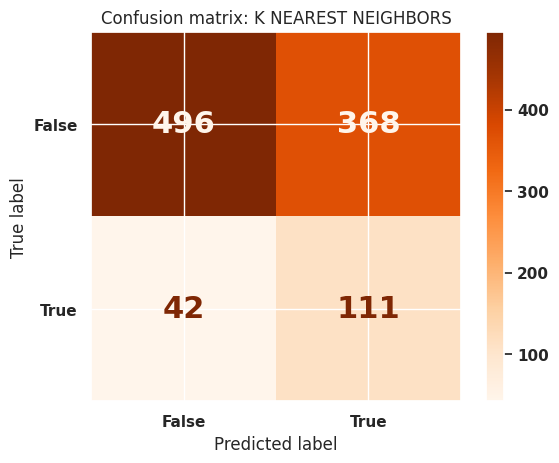

In [ ]:
# Confusion matrix
knn_confusion_matrix = cm(y_test, knn_test_pred)
cm_display = cmd(confusion_matrix = knn_confusion_matrix, display_labels = [False, True])

font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 22}
plt.rc('font', **font)

cm_display.plot(cmap='Oranges')
plt.title('Confusion matrix: K NEAREST NEIGHBORS')
plt.show()

False negatives obtained after using KNN: 37

### ML Model - 3 :Naive Bayes

In [ ]:
# ML Model - 3 Implementation
# Using stratified k fold cross validation so that each split
# has almost equal proportion of classification results
cv_method = RepeatedStratifiedKFold(n_splits=4,
                                    n_repeats=3,
                                    random_state=0)

# Fit the Algorithm
nb_model = GaussianNB()
nb_params = {'var_smoothing': np.logspace(0,-9, num=100)
             }
# Predict on the model

In [ ]:
nb_gridsearch = GridSearchCV(nb_model,
                             nb_params,
                             cv=cv_method,
                             scoring= 'recall')
nb_gridsearch.fit(X_smote_scaled,y_smote)
nb_best_params = nb_gridsearch.best_params_
nb_best_params

{'var_smoothing': 1.0}

In [ ]:
# building knn model with best parameters
nb_model = GaussianNB(var_smoothing=nb_best_params['var_smoothing'])

In [ ]:
# training the model
nb_model.fit(X_smote_scaled, y_smote)

GaussianNB(var_smoothing=1.0)

In [ ]:
# Train predictions
nb_train_pred = nb_model.predict(X_smote_scaled)
# training set recall
nb_train_recall = recall(y_smote,nb_train_pred)
nb_train_recall

0.6223325062034739

In [ ]:
# Test predictions
nb_test_pred = nb_model.predict(X_test_scaled)
# Test recall
nb_test_recall = recall(y_test,nb_test_pred)
nb_test_recall


0.5686274509803921

In [ ]:
# Classification report
print(classification_report(y_test,nb_test_pred))

              precision    recall  f1-score   support

           0       0.90      0.72      0.80       864
           1       0.27      0.57      0.36       153

    accuracy                           0.70      1017
   macro avg       0.58      0.64      0.58      1017
weighted avg       0.81      0.70      0.74      1017



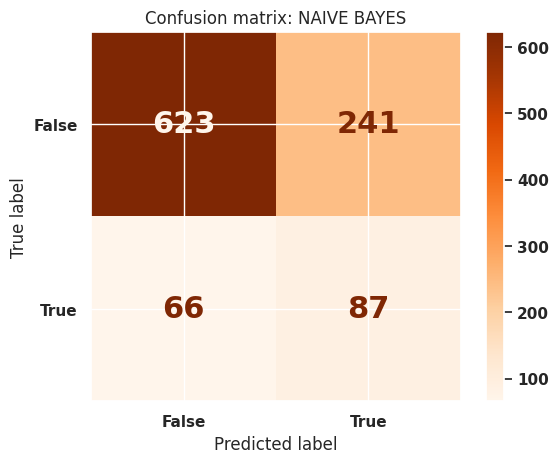

In [ ]:
# Confusion matrix
nb_confusion_matrix = cm(y_test, nb_test_pred)
cm_display = cmd(confusion_matrix = nb_confusion_matrix, display_labels = [False, True])

font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 22}
plt.rc('font', **font)

cm_display.plot(cmap='Oranges')
plt.title('Confusion matrix: NAIVE BAYES')
plt.show()

False negatives obtained after using Naive Bayes: 74

##ML Model -4: Decision tree

In [ ]:
# Max depth of dt without hyperparameter tuning = 28 and min samples leaf = 1
dt_model = DecisionTreeClassifier()
dt_params = {'max_depth':np.arange(1,10),
             'min_samples_split':np.arange(0.1,1,0.1),
             'min_samples_leaf':np.arange(0.1,0.6,0.1)
             }


In [ ]:
# using gridsearchcv to find best parameters
dt_gridsearch = GridSearchCV(dt_model,
                             dt_params,
                             cv=cv_method,
                             scoring= 'recall')
dt_gridsearch.fit(X_smote,y_smote)
dt_best_params = dt_gridsearch.best_params_
dt_best_params

{'max_depth': 1, 'min_samples_leaf': 0.1, 'min_samples_split': 0.1}

In [ ]:
# building knn model with best parameters
dt_model = DecisionTreeClassifier(max_depth=dt_best_params['max_depth'],
                                  min_samples_split=dt_best_params['min_samples_split'],
                                  min_samples_leaf=dt_best_params['min_samples_leaf'])

dt_model.fit(X_smote_scaled, y_smote)

DecisionTreeClassifier(max_depth=1, min_samples_leaf=0.1, min_samples_split=0.1)

In [ ]:
# Train predictions
dt_train_pred = dt_model.predict(X_smote_scaled)
# training set recall
dt_train_recall = recall(y_smote,dt_train_pred)
dt_train_recall

0.852605459057072

In [ ]:
# Test predictions
dt_test_pred = dt_model.predict(X_test_scaled)
# Test recall
dt_test_recall = recall(y_test,dt_test_pred)
dt_test_recall

0.7712418300653595

In [ ]:
# Classification report
print(classification_report(y_test,dt_test_pred))

              precision    recall  f1-score   support

           0       0.92      0.47      0.62       864
           1       0.21      0.77      0.32       153

    accuracy                           0.52      1017
   macro avg       0.56      0.62      0.47      1017
weighted avg       0.81      0.52      0.58      1017



<Axes: title={'center': 'Feature Importances: DECISION TREE'}>

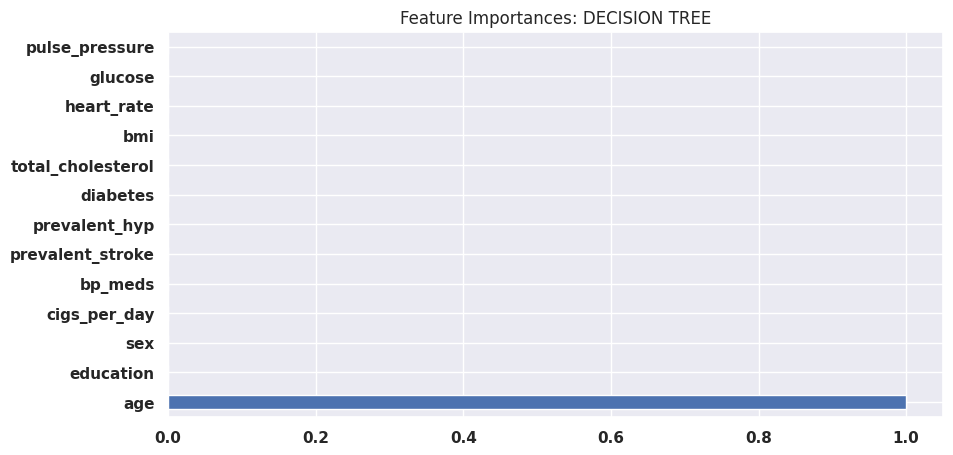

In [ ]:

# Feature importances

dt_feat_imp = pd.Series(dt_model.feature_importances_, index=X.columns)
plt.figure(figsize=(10,5))
plt.title('Feature Importances: DECISION TREE')
plt.xlabel('Relative Importance')
dt_feat_imp.nlargest(20).plot(kind='barh')

Only one feature (age) was given imporatance while fitting a decision tree model. This is because of max depth being 1.



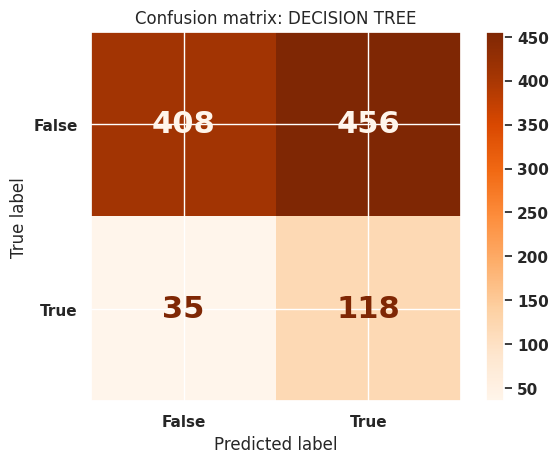

In [ ]:
# Confusion matrix
dt_confusion_matrix = cm(y_test, dt_test_pred)
cm_display = cmd(confusion_matrix = dt_confusion_matrix, display_labels = [False, True])

font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 22}
plt.rc('font', **font)

cm_display.plot(cmap='Oranges')
plt.title('Confusion matrix: DECISION TREE')
plt.show()

false negatives=47

##ML Model - 5: Random Forest


In [ ]:

# random forest model
rf_model = RandomForestClassifier(random_state=0)
rf_params = {'n_estimators':[500],                    # limited due to computational power availability
             'max_depth':np.arange(1,6),
             'min_samples_split':np.arange(0.1,1,0.1),
             'min_samples_leaf':np.arange(0.1,0.6,0.1)}

In [ ]:
# using gridsearchcv to find best parameters
rf_gridsearch = GridSearchCV(rf_model,rf_params,cv=cv_method,scoring='recall')
rf_gridsearch.fit(X_smote,y_smote)
rf_best_params = rf_gridsearch.best_params_
rf_best_params

{'max_depth': 2,
 'min_samples_leaf': 0.1,
 'min_samples_split': 0.1,
 'n_estimators': 500}

In [ ]:
# Fitting RF model with best parameters
rf_model = RandomForestClassifier(n_estimators=rf_best_params['n_estimators'],
                                  min_samples_leaf=rf_best_params['min_samples_leaf'],
                                  min_samples_split=rf_best_params['min_samples_split'],
                                  max_depth=rf_best_params['max_depth'],
                                  random_state=0)

# fit
rf_model.fit(X_smote,y_smote)

RandomForestClassifier(max_depth=2, min_samples_leaf=0.1, min_samples_split=0.1,
                       n_estimators=500, random_state=0)

In [ ]:
# train predictions
rf_train_pred = rf_model.predict(X_smote)
# train recall
rf_train_recall = recall(y_smote,rf_train_pred)
rf_train_recall

0.6918114143920595

In [ ]:
# Test predictions
rf_test_pred = rf_model.predict(X_test)
# test recall
rf_test_recall = recall(y_test,rf_test_pred)
rf_test_recall

0.6470588235294118

In [ ]:
# Classification report
print(classification_report(y_test,rf_test_pred))

              precision    recall  f1-score   support

           0       0.91      0.66      0.77       864
           1       0.25      0.65      0.36       153

    accuracy                           0.66      1017
   macro avg       0.58      0.65      0.57      1017
weighted avg       0.81      0.66      0.71      1017



<Axes: title={'center': 'Feature Importances: RANDOM FORESTS'}>

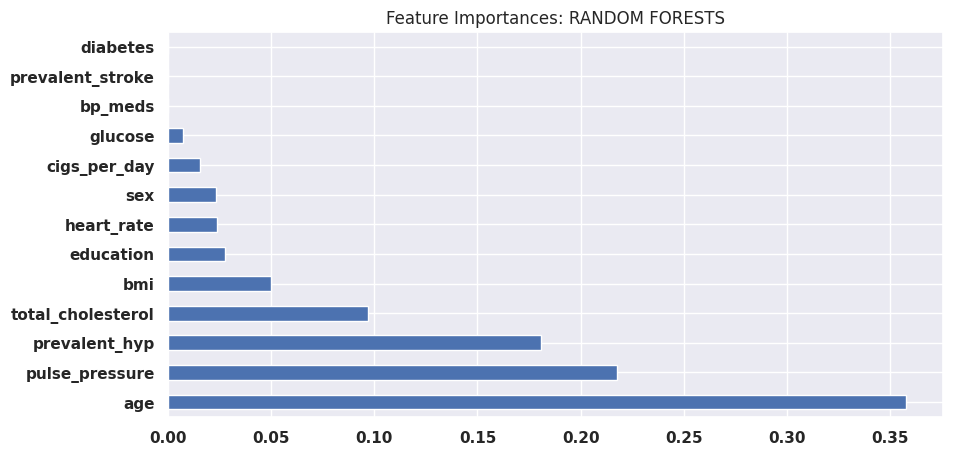

In [ ]:
# Feature importances

rf_feat_imp = pd.Series(rf_model.feature_importances_, index=X.columns)
plt.figure(figsize=(10,5))
plt.title('Feature Importances: RANDOM FORESTS')
plt.xlabel('Relative Importance')
rf_feat_imp.nlargest(20).plot(kind='barh')

Features other than age are also given importance in this case insted of just one feature in case of decision tree.

But age still remains the most important feature in predicting the final outcome for random forests.

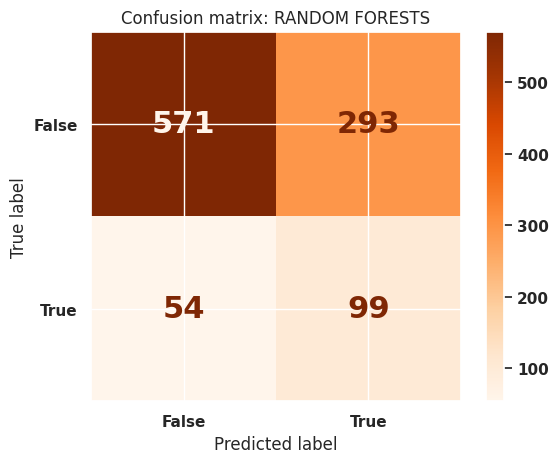

In [ ]:
# Confusion matrix
rf_confusion_matrix = cm(y_test, rf_test_pred)
cm_display = cmd(confusion_matrix = rf_confusion_matrix, display_labels = [False, True])

font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 22}
plt.rc('font', **font)

cm_display.plot(cmap='Oranges')
plt.title('Confusion matrix: RANDOM FORESTS')
plt.show()

false positives=58

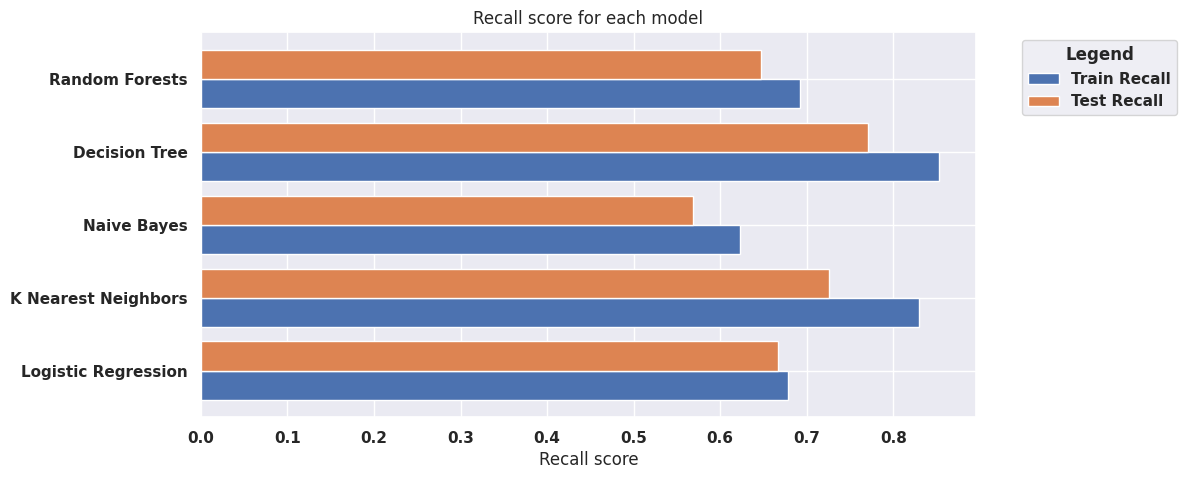

In [ ]:
# Plotting Recall scores

ML_models = ['Logistic Regression','K Nearest Neighbors','Naive Bayes','Decision Tree','Random Forests']
train_recalls = [lr_train_recall,knn_train_recall,nb_train_recall,dt_train_recall,rf_train_recall]
test_recalls = [lr_test_recall,knn_test_recall,nb_test_recall,dt_test_recall,rf_test_recall]

X_axis = np.arange(len(ML_models))

plt.figure(figsize=(10,5))
plt.barh(X_axis - 0.2, train_recalls, 0.4, label = 'Train Recall')
plt.barh(X_axis + 0.2, test_recalls, 0.4, label = 'Test Recall')

plt.yticks(X_axis,ML_models)
plt.xlabel("Recall score")
plt.title("Recall score for each model")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',title='Legend')
plt.show()


# **Conclusion**

We used 5 machine learning models to perform this prediction also did hyperparameter tuning on some.

We implemented normalizing techniques, scaling, sampling to remove outliers and reduce bias.

Recall was chosen as the model evaluation metric because it was very important that we reduce the false negatives.

It is critical that the model we develop has a high recall score. It is OK if the model incorrectly identifies a healthy patient as a high risk patient because it will not result in death, but if a high risk patient is incorrectly labelled as healthy, it may result in fatality.

We were able to create a model with a recall of just 0.75 because of limitated data available and limited computational power availabe.

From our analysis, it is also found that the age of a person was the most important feature in determining the risk of a patient getting infected with CHD

Future developments must include a strategy to improve the model recall score

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***